Vision Zero aims to eliminate deaths and severe injuries on the roads of various cities. The City of Chicago offers the data on crashes which I decided to work with in order to see what can be done to achieve zero deaths on the city.
The questions I asked: 
What behaviours are associated with the mortality and serious injuries on the roads?
What structural conditions can be changed or improved in order to bring the deaths and serious injuries down to zero?


In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import datetime as dt
from matplotlib.ticker import FuncFormatter
import chart_studio.plotly as py
import plotly.graph_objects as go
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [7]:
df1 = pd.read_csv('/Users/Masha/code/nltk/Traffic_Crashes_-_Crashes.csv')

In [200]:
#taking the sample from October 2017 from which the collection became uniformal
dates_parsed = pd.to_datetime(df1["CRASH_DATE"])
df1 = df1[dates_parsed >= pd.to_datetime("2017-10-01")]

In [201]:
df1.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,YEAR,MONTH,CRASH_DAY
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,2019-07-10 17:56:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),2019,7,Wednesday
1,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,2020-07-10 10:25:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,...,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008),2020,7,Friday
2,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,2020-07-11 01:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011),2020,7,Saturday
4,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,JC194776,2019-03-21 22:50:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,...,0.0,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989),2019,3,Thursday
5,0126747fc9ffc0edc9a38abb83d80034f897db0f739eef...,JB200478,2018-03-26 14:23:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,14,2,3,41.953647,-87.732082,POINT (-87.732081736006 41.953646899951),2018,3,Monday


In [10]:
df1.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,381296.000000,110791.000000,381296.000000,381296.000000,381296.000000,380461.000000,380461.000000,380461.000000,380461.000000,380461.000000,380461.000000,380461.0,381296.000000,381296.000000,381296.000000,379034.000000,379034.000000
mean,28.392210,2.534583,3684.113757,1251.428809,2.036297,0.195444,0.001164,0.021406,0.110492,0.062382,2.011920,0.0,13.189443,4.120119,6.631913,41.855893,-87.674509
std,6.171979,1.904980,2843.754496,703.984805,0.467279,0.572357,0.036916,0.170805,0.428917,0.319393,1.183579,0.0,5.546689,1.980379,3.591275,0.330379,0.670591
min,0.000000,0.000000,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.934763
25%,30.000000,2.000000,1251.000000,722.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,3.000000,41.784169,-87.722426
50%,30.000000,2.000000,3200.000000,1213.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.875803,-87.674897
75%,30.000000,4.000000,5550.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924987,-87.634201
max,70.000000,100.000000,13799.000000,6100.000000,18.000000,21.000000,3.000000,7.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381296 entries, 0 to 489567
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                381296 non-null  object 
 1   RD_NO                          377647 non-null  object 
 2   CRASH_DATE_EST_I               27360 non-null   object 
 3   CRASH_DATE                     381296 non-null  object 
 4   POSTED_SPEED_LIMIT             381296 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         381296 non-null  object 
 6   DEVICE_CONDITION               381296 non-null  object 
 7   WEATHER_CONDITION              381296 non-null  object 
 8   LIGHTING_CONDITION             381296 non-null  object 
 9   FIRST_CRASH_TYPE               381296 non-null  object 
 10  TRAFFICWAY_TYPE                381296 non-null  object 
 11  LANE_CNT                       110791 non-null  float64
 12  ALIGNMENT                     

In [14]:
df1.index

Int64Index([     0,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            489558, 489559, 489560, 489561, 489562, 489563, 489564, 489565,
            489566, 489567],
           dtype='int64', length=381296)

In [15]:
#resetting the index 
df1.reset_index(drop=True)

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
2,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
3,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN
4,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,JC194776,NaN,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,0.0,0.0,2.0,0.0,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381291,f37d01cdad7c3e9fe01562aa11857405cc2ea38738d8b6...,JE116847,NaN,01/19/2021 07:30:00 AM,15,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,FIXED OBJECT,...,0.0,0.0,2.0,0.0,7,3,1,41.877790,-87.636488,POINT (-87.636487589354 41.877790161619)
381292,f1dba052d8fc8c80d3d693296ff8e0d7cc71d5929677b0...,JE118336,NaN,01/20/2021 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,0.0,0.0,2.0,0.0,17,4,1,41.800697,-87.706358,POINT (-87.706357916164 41.800697419369)
381293,f2962f241a302417913e1b7465e8ae37e6f3161adaa0cf...,JE118196,NaN,01/20/2021 04:15:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,16,4,1,41.924709,-87.717371,POINT (-87.717371333013 41.924708659649)
381294,f361f7362d783dc327e5e6b7d2d9bc4bd942284391ad36...,JE118233,NaN,01/20/2021 03:20:00 PM,30,STOP SIGN/FLASHER,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,ANGLE,...,0.0,0.0,4.0,0.0,15,4,1,41.802871,-87.684416,POINT (-87.684416341899 41.802870816721)


In [17]:
#droping the columns that bear limited use
df1.drop(['CRASH_DATE_EST_I', 'LANE_CNT', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS'], axis=1, inplace=True)

In [18]:
df1

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN
5,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,JC194776,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489563,f37d01cdad7c3e9fe01562aa11857405cc2ea38738d8b6...,JE116847,01/19/2021 07:30:00 AM,15,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,FIXED OBJECT,PARKING LOT,...,0.0,0.0,2.0,0.0,7,3,1,41.877790,-87.636488,POINT (-87.636487589354 41.877790161619)
489564,f1dba052d8fc8c80d3d693296ff8e0d7cc71d5929677b0...,JE118336,01/20/2021 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,17,4,1,41.800697,-87.706358,POINT (-87.706357916164 41.800697419369)
489565,f2962f241a302417913e1b7465e8ae37e6f3161adaa0cf...,JE118196,01/20/2021 04:15:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,16,4,1,41.924709,-87.717371,POINT (-87.717371333013 41.924708659649)
489566,f361f7362d783dc327e5e6b7d2d9bc4bd942284391ad36...,JE118233,01/20/2021 03:20:00 PM,30,STOP SIGN/FLASHER,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,0.0,4.0,0.0,15,4,1,41.802871,-87.684416,POINT (-87.684416341899 41.802870816721)


In [19]:
#reseting index after dropping some columns
df1.reset_index(drop=True, inplace=True)

In [20]:
df1.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
2,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
3,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN
4,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,JC194776,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)


In [21]:
df1.info

<bound method DataFrame.info of                                           CRASH_RECORD_ID     RD_NO  \
0       4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...  JC343143   
1       ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...  JD292400   
2       f8960f698e870ebdc60b521b2a141a5395556bc3704191...  JD293602   
3       8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...  JD290451   
4       00e47f189660cd8ba1e85fc63061bf1d8465184393f134...  JC194776   
...                                                   ...       ...   
381291  f37d01cdad7c3e9fe01562aa11857405cc2ea38738d8b6...  JE116847   
381292  f1dba052d8fc8c80d3d693296ff8e0d7cc71d5929677b0...  JE118336   
381293  f2962f241a302417913e1b7465e8ae37e6f3161adaa0cf...  JE118196   
381294  f361f7362d783dc327e5e6b7d2d9bc4bd942284391ad36...  JE118233   
381295  f51408f91e4d33372bf353d02203a96a039448b4d75375...  JE118305   

                    CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0       07/10/2019 05:56:00 PM        

In [22]:
#checking the indexing
df1.index

RangeIndex(start=0, stop=381296, step=1)

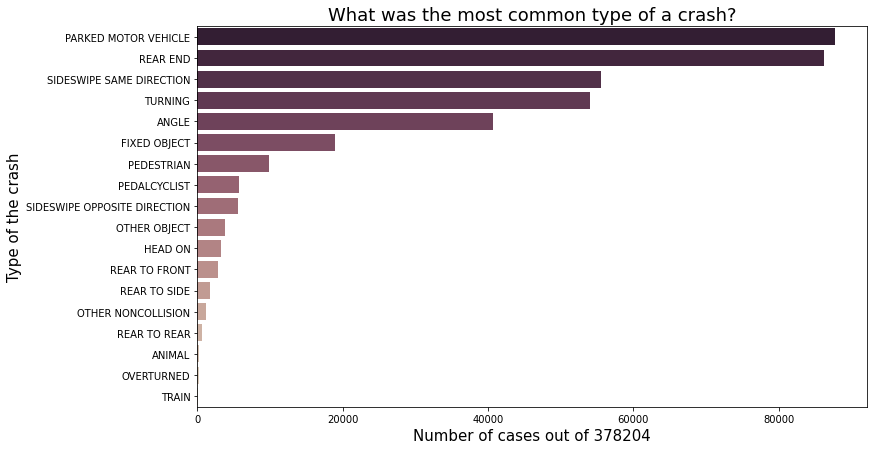

In [134]:
plt.figure(figsize=(12, 7))
sns.countplot(y='FIRST_CRASH_TYPE', palette="ch:.25_r", data=df1, order = df1['FIRST_CRASH_TYPE'].value_counts().index)
plt.xlabel(f"Number of cases out of {len(df1)}", size=15)
plt.ylabel("Type of the crash", size=15)
plt.title("What was the most common type of a crash?", size=18);
#the two most common are crashes into parked motor vehicle and rear end

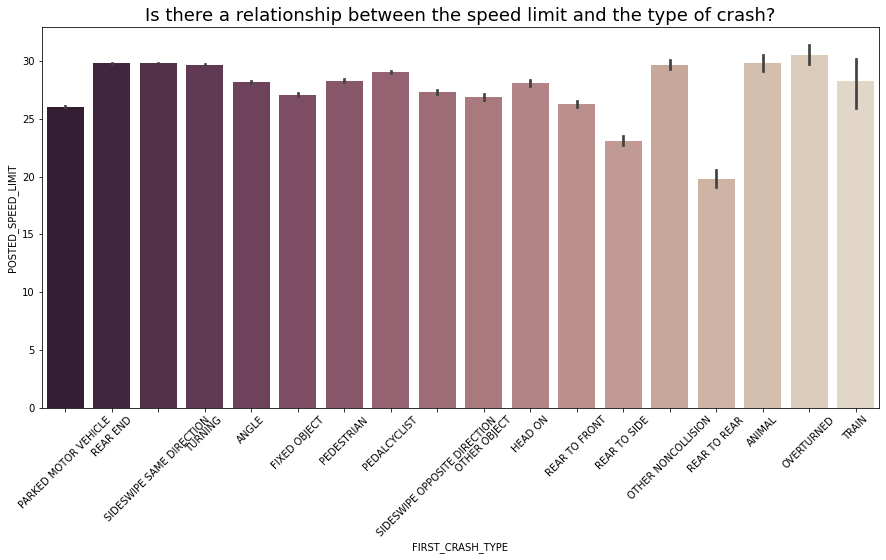

In [208]:
plt.figure(figsize=(15, 7))
sns.barplot(x="FIRST_CRASH_TYPE", y="POSTED_SPEED_LIMIT", palette="ch:.25_r", data=df1, order = df1['FIRST_CRASH_TYPE'].value_counts().index)
plt.title("Is there a relationship between the speed limit and the type of crash?", size=18)
plt.xticks(rotation=45);
# no clear connection, all above 20, with the lowest being rear to end (intuitively, in a traffic jam) 

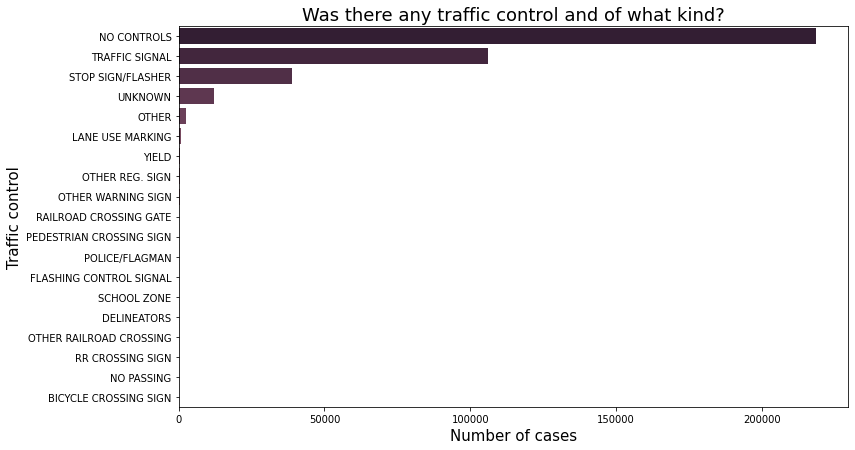

In [25]:
plt.figure(figsize=(12, 7))
sns.countplot(y='TRAFFIC_CONTROL_DEVICE', palette="ch:.25_r", data=df1, order = df1['TRAFFIC_CONTROL_DEVICE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Traffic control", size=15)
plt.title("Was there any traffic control and of what kind?", size=18);
#mostly no control

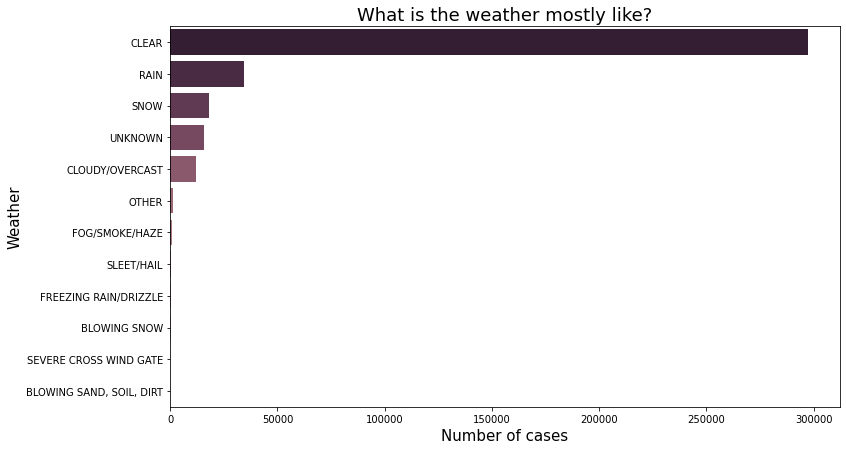

In [26]:
plt.figure(figsize=(12, 7))
sns.countplot(y='WEATHER_CONDITION', palette="ch:.25_r", data=df1, order = df1['WEATHER_CONDITION'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Weather", size=15)
plt.title("What is the weather mostly like?", size=18);
#mostly clear weather

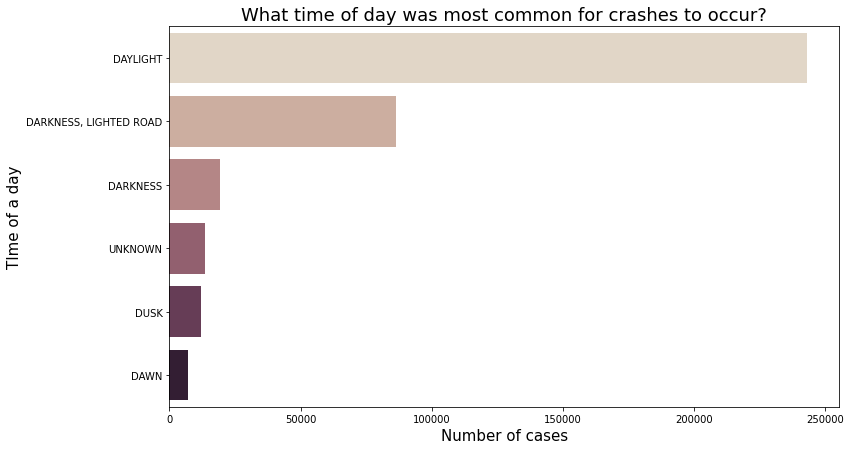

In [27]:
plt.figure(figsize=(12, 7))
sns.countplot(y='LIGHTING_CONDITION', palette="ch:.25", data=df1, order = df1['LIGHTING_CONDITION'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("TIme of a day", size=15)
plt.title("What time of day was most common for crashes to occur?", size=18);
#mostly happening in a broad daylight

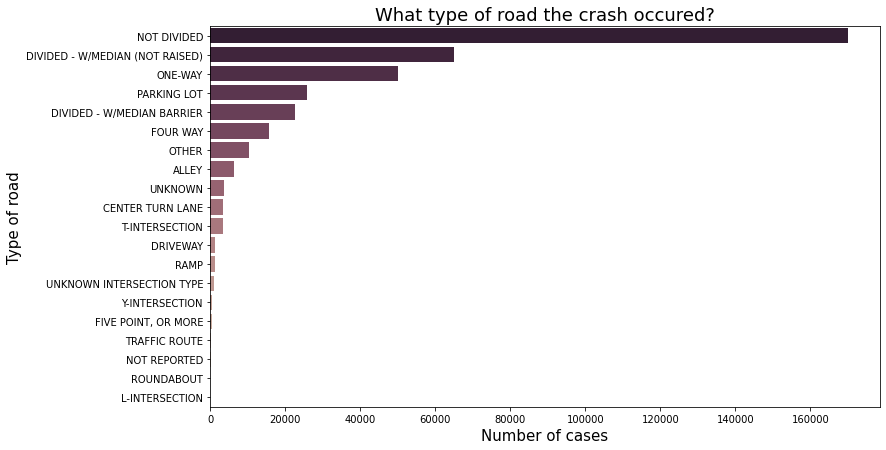

In [28]:
plt.figure(figsize=(12, 7))
sns.countplot(y='TRAFFICWAY_TYPE', palette="ch:.25_r", data=df1, order = df1['TRAFFICWAY_TYPE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Type of road", size=15)
plt.title("What type of road the crash occured?", size=18);
#mostly not divided - i.e. not impeding the maneuvre

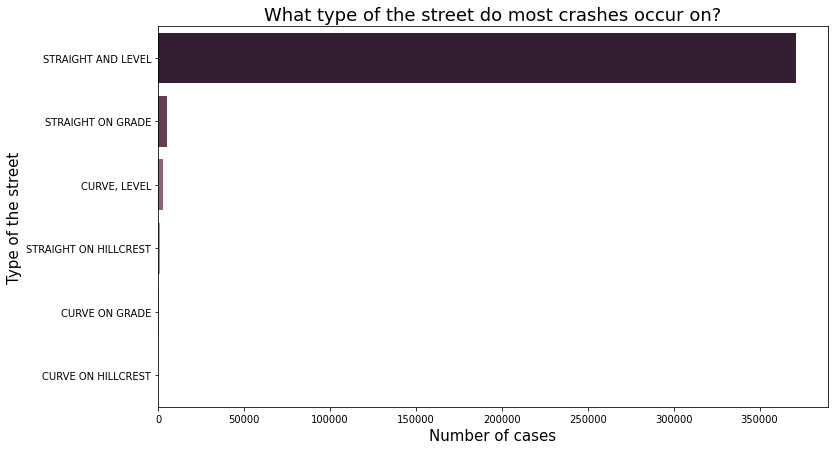

In [29]:
plt.figure(figsize=(12, 7))
sns.countplot(y='ALIGNMENT', palette="ch:.25_r", data=df1, order = df1['ALIGNMENT'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Type of the street", size=15)
plt.title("What type of the street do most crashes occur on?", size=18);
#mostly straight and level streets, i.e. Chicago is flat

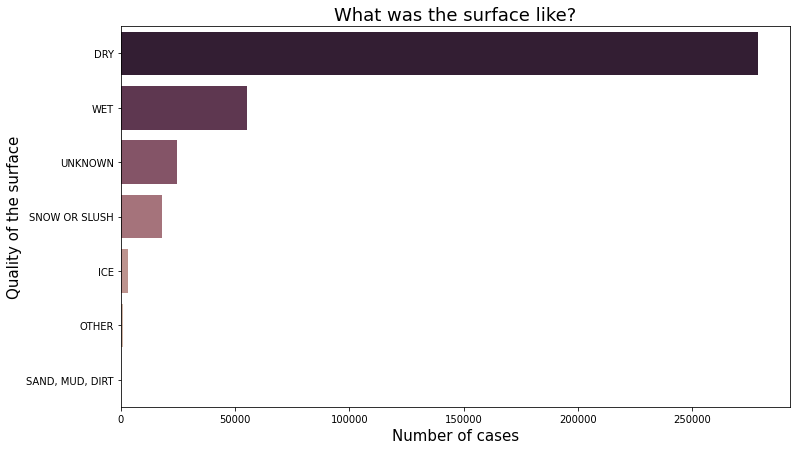

In [31]:
plt.figure(figsize=(12, 7))
sns.countplot(y='ROADWAY_SURFACE_COND', palette="ch:.25_r", data=df1, order = df1['ROADWAY_SURFACE_COND'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Quality of the surface", size=15)
plt.title("What was the surface like?", size=18);
#mostly dry surface

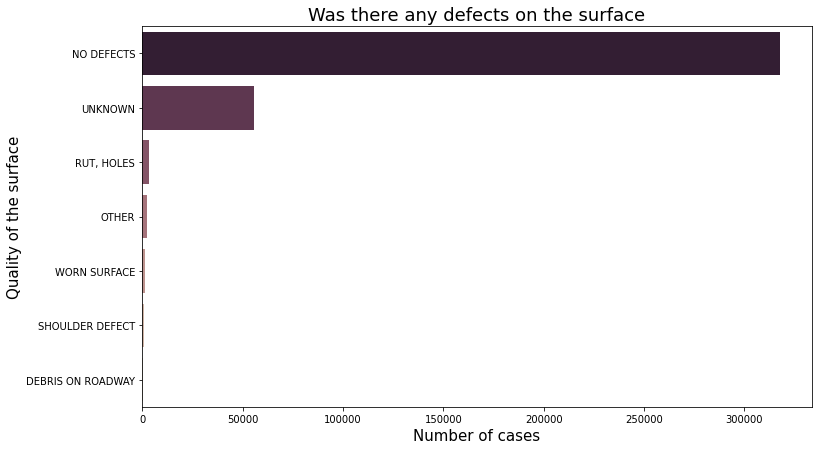

In [32]:
plt.figure(figsize=(12, 7))
sns.countplot(y='ROAD_DEFECT', palette="ch:.25_r", data=df1, order = df1['ROAD_DEFECT'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Quality of the surface", size=15)
plt.title("Was there any defects on the surface", size=18);
#mostly no defects

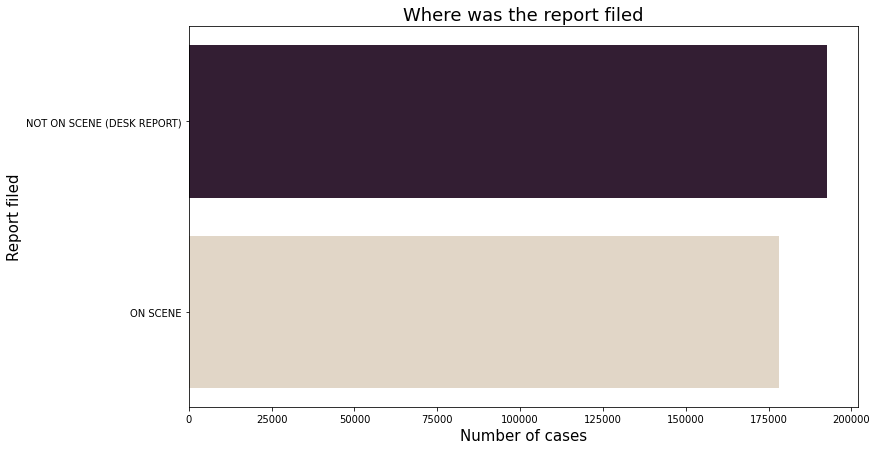

In [33]:
plt.figure(figsize=(12, 7))
sns.countplot(y='REPORT_TYPE', palette="ch:.25_r", data=df1, order = df1['REPORT_TYPE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Report filed", size=15)
plt.title("Where was the report filed", size=18);
#how come it's almost 50/50 split?

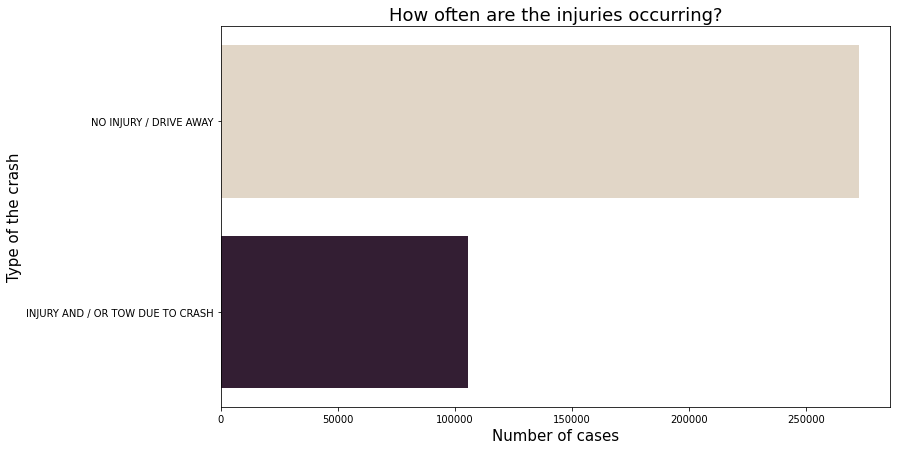

In [127]:
plt.figure(figsize=(12, 7))
sns.countplot(y='CRASH_TYPE', palette="ch:.25", data=df1, order = df1['CRASH_TYPE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Type of the crash", size=15)
plt.title("How often are the injuries occurring?", size=18);
#roughly in 1/3 of the cases

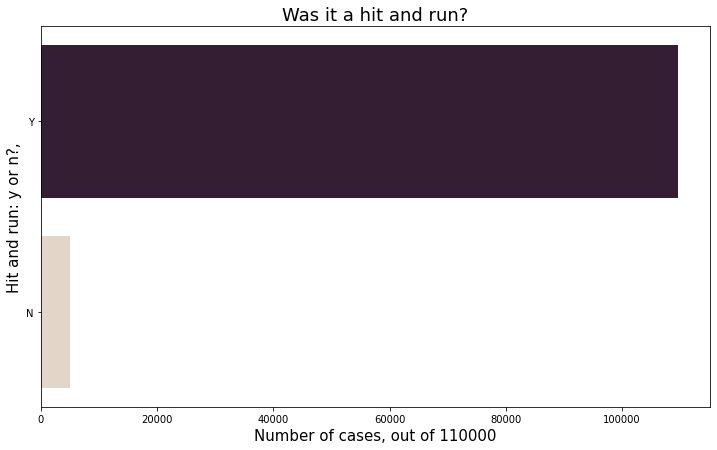

In [35]:
plt.figure(figsize=(12, 7))
sns.countplot(y='HIT_AND_RUN_I', palette="ch:.25_r", data=df1, order = df1['HIT_AND_RUN_I'].value_counts().index)
plt.xlabel("Number of cases, out of 110000", size=15)
plt.ylabel("Hit and run: y or n?,", size=15)
plt.title("Was it a hit and run?", size=18);
#roughly in 1/3 of the cases

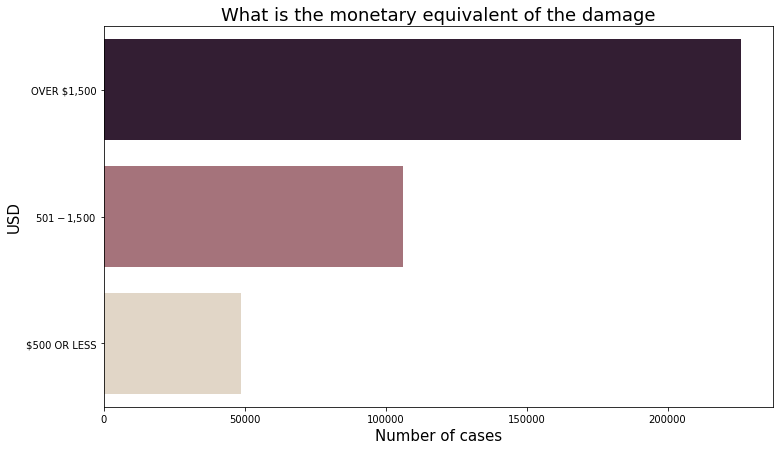

In [36]:
plt.figure(figsize=(12, 7))
sns.countplot(y='DAMAGE', palette="ch:.25_r", data=df1, order = df1['DAMAGE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("USD", size=15)
plt.title("What is the monetary equivalent of the damage", size=18);


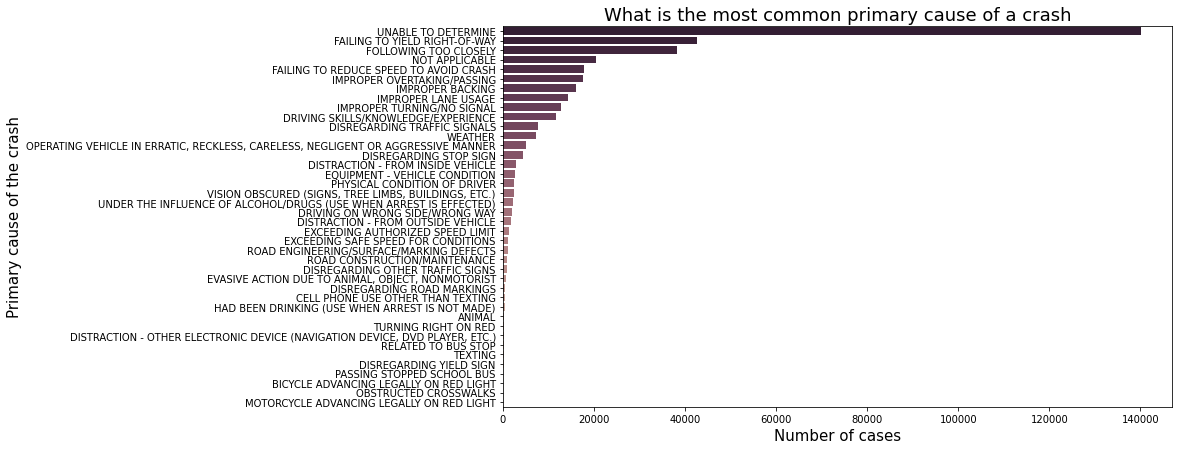

In [37]:
plt.figure(figsize=(12, 7))
sns.countplot(y='PRIM_CONTRIBUTORY_CAUSE', palette="ch:.25_r", data=df1, order = df1['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Primary cause of the crash", size=15)
plt.title("What is the most common primary cause of a crash", size=18);
#after not able to determine, the failing to yield right of way and following too closely are the top causes


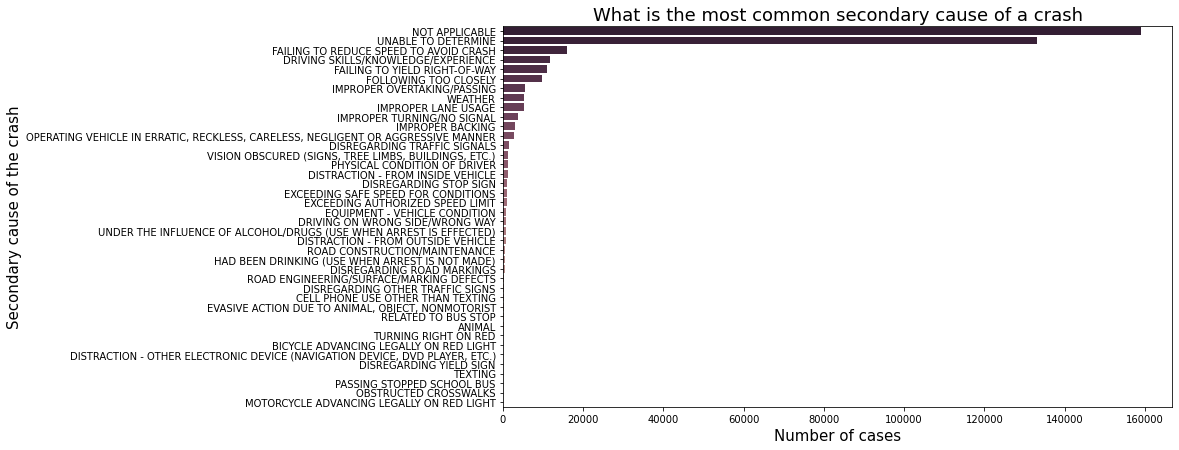

In [38]:
plt.figure(figsize=(12, 7))
sns.countplot(y='SEC_CONTRIBUTORY_CAUSE', palette="ch:.25_r", data=df1, order = df1['SEC_CONTRIBUTORY_CAUSE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Secondary cause of the crash", size=15)
plt.title("What is the most common secondary cause of a crash", size=18);
#after not able to determine and n/a, the failing to yield right of way and following too closely are preceded by failing to reduce speed and the lack of experience as the top causes


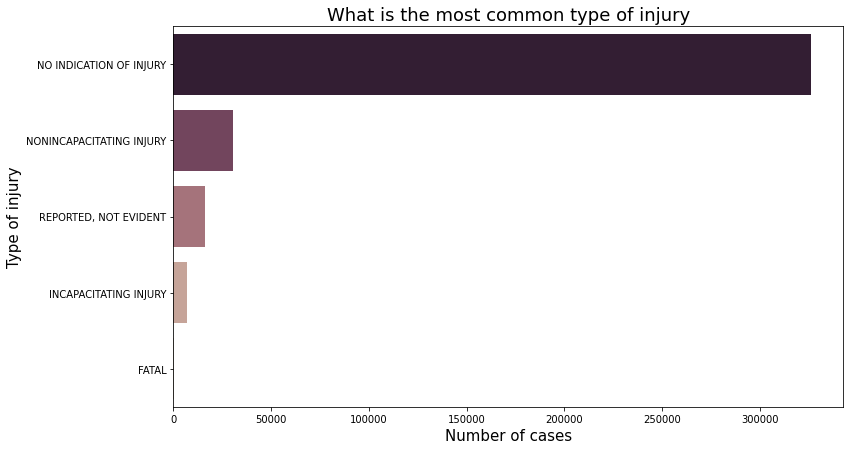

In [39]:
plt.figure(figsize=(12, 7))
sns.countplot(y='MOST_SEVERE_INJURY', palette="ch:.25_r", data=df1, order = df1['MOST_SEVERE_INJURY'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Type of injury", size=15)
plt.title("What is the most common type of injury", size=18);
#the majority of crashes are without injuries


In [40]:
#breaking down types of injuries
df1['MOST_SEVERE_INJURY'].value_counts()

NO INDICATION OF INJURY     326280
NONINCAPACITATING INJURY     30568
REPORTED, NOT EVIDENT        16264
INCAPACITATING INJURY         6932
FATAL                          410
Name: MOST_SEVERE_INJURY, dtype: int64

In [41]:
#preparing the crash date to further check for the differences in report filings
df1['CRASH_DATE'] = pd.to_datetime(df1['CRASH_DATE'])
df1['CRASH_DATE']

0        2019-07-10 17:56:00
1        2020-07-10 10:25:00
2        2020-07-11 01:00:00
3        2020-07-08 14:00:00
4        2019-03-21 22:50:00
                 ...        
381291   2021-01-19 07:30:00
381292   2021-01-20 17:50:00
381293   2021-01-20 16:15:00
381294   2021-01-20 15:20:00
381295   2021-01-20 16:30:00
Name: CRASH_DATE, Length: 381296, dtype: datetime64[ns]

In [42]:
df1['CRASH_DATE'].dt.year

0         2019
1         2020
2         2020
3         2020
4         2019
          ... 
381291    2021
381292    2021
381293    2021
381294    2021
381295    2021
Name: CRASH_DATE, Length: 381296, dtype: int64

In [43]:
df1['CRASH_DATE'].dt.month

0         7
1         7
2         7
3         7
4         3
         ..
381291    1
381292    1
381293    1
381294    1
381295    1
Name: CRASH_DATE, Length: 381296, dtype: int64

In [44]:
#adding to the dataframe
df1['YEAR'] = df1['CRASH_DATE'].dt.year
df1['MONTH'] = df1['CRASH_DATE'].dt.month
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381296 entries, 0 to 381295
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                381296 non-null  object        
 1   RD_NO                          377647 non-null  object        
 2   CRASH_DATE                     381296 non-null  datetime64[ns]
 3   POSTED_SPEED_LIMIT             381296 non-null  int64         
 4   TRAFFIC_CONTROL_DEVICE         381296 non-null  object        
 5   DEVICE_CONDITION               381296 non-null  object        
 6   WEATHER_CONDITION              381296 non-null  object        
 7   LIGHTING_CONDITION             381296 non-null  object        
 8   FIRST_CRASH_TYPE               381296 non-null  object        
 9   TRAFFICWAY_TYPE                381296 non-null  object        
 10  ALIGNMENT                      381296 non-null  object        
 11  

In [45]:
#resetting index 
df1.reset_index(drop=True, inplace=True)

In [46]:
#checking the df
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381296 entries, 0 to 381295
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                381296 non-null  object        
 1   RD_NO                          377647 non-null  object        
 2   CRASH_DATE                     381296 non-null  datetime64[ns]
 3   POSTED_SPEED_LIMIT             381296 non-null  int64         
 4   TRAFFIC_CONTROL_DEVICE         381296 non-null  object        
 5   DEVICE_CONDITION               381296 non-null  object        
 6   WEATHER_CONDITION              381296 non-null  object        
 7   LIGHTING_CONDITION             381296 non-null  object        
 8   FIRST_CRASH_TYPE               381296 non-null  object        
 9   TRAFFICWAY_TYPE                381296 non-null  object        
 10  ALIGNMENT                      381296 non-null  object        
 11  

In [48]:
#might there be a connection between the seasons and types of injuries?
df1piv = df1.pivot_table(index='MONTH',columns='YEAR', values='INJURIES_FATAL');

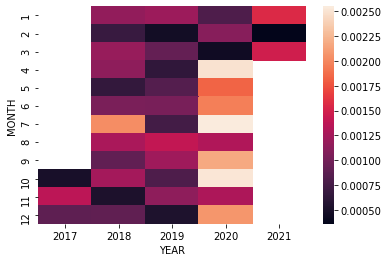

In [49]:
sns.heatmap(df1piv);

In [119]:
#or with the crash type?
df1piv4 = df1.pivot_table(index='MOST_SEVERE_INJURY',columns='FIRST_CRASH_TYPE');

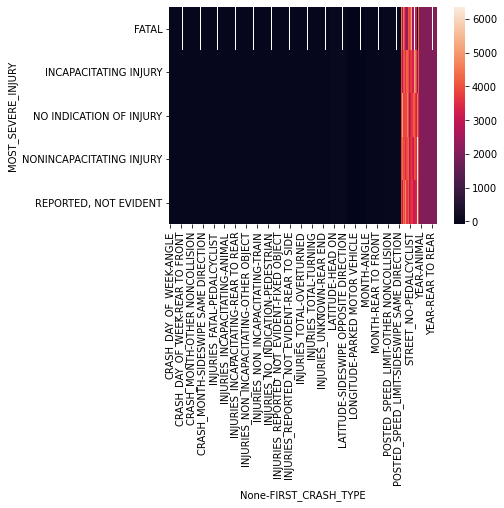

In [120]:
sns.heatmap(df1piv4);

In [50]:
df1piv2 = df1.pivot_table(index='MONTH',columns='YEAR', values='POSTED_SPEED_LIMIT');

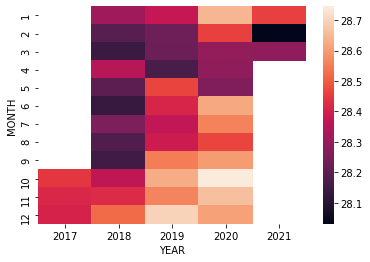

In [51]:
sns.heatmap(df1piv2);

In [121]:
#trying another method: crosstabulating first
crosstabres=pd.crosstab(index=df1['MOST_SEVERE_INJURY'], columns=df1['FIRST_CRASH_TYPE'])

In [122]:
crosstabres

FIRST_CRASH_TYPE,ANGLE,ANIMAL,FIXED OBJECT,HEAD ON,OTHER NONCOLLISION,OTHER OBJECT,OVERTURNED,PARKED MOTOR VEHICLE,PEDALCYCLIST,PEDESTRIAN,REAR END,REAR TO FRONT,REAR TO REAR,REAR TO SIDE,SIDESWIPE OPPOSITE DIRECTION,SIDESWIPE SAME DIRECTION,TRAIN,TURNING
MOST_SEVERE_INJURY,,,,,,,,,,,,,,,,,,
FATAL,39,4,109,19,3,9,0,49,18,96,16,2,0,0,4,9,1,28
INCAPACITATING INJURY,1041,6,582,173,34,81,19,462,553,1656,926,12,0,16,81,308,2,941
NO INDICATION OF INJURY,31798,254,15762,2275,993,3360,127,84660,1736,1242,74392,2694,605,1634,4909,52604,12,45272
NONINCAPACITATING INJURY,5111,6,1989,597,129,245,68,1880,2768,5265,5432,72,4,73,359,1429,6,4971
"REPORTED, NOT EVIDENT",2738,4,506,186,27,77,13,711,618,1564,5511,42,6,28,171,1147,5,2811


<AxesSubplot:xlabel='FIRST_CRASH_TYPE', ylabel='MOST_SEVERE_INJURY'>

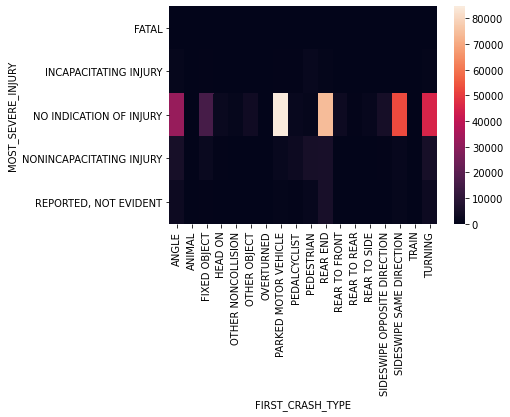

In [123]:
sns.heatmap(crosstabres)

In [125]:
#maybe chi2
ChiSqResult = chi2_contingency(crosstabres)

In [126]:
ChiSqResult

(82057.67979467391,
 0.0,
 68,
 array([[4.37210290e+01, 2.94143000e-01, 2.03409546e+01, 3.48892244e+00,
         1.27318831e+00, 4.04929706e+00, 2.43687813e-01, 9.42137881e+01,
         6.11151860e+00, 1.05451339e+01, 9.26196189e+01, 3.02945819e+00,
         6.60211477e-01, 1.87972406e+00, 5.93009463e+00, 5.95768396e+01,
         2.79113795e-02, 5.79944791e+01],
        [7.42288307e+02, 4.99391058e+00, 3.45345320e+02, 5.92343408e+01,
         2.16159779e+01, 6.87482873e+01, 4.13729088e+00, 1.59954591e+03,
         1.03760339e+02, 1.79033517e+02, 1.57248038e+03, 5.14336338e+01,
         1.12089599e+01, 3.19136402e+01, 1.00680153e+02, 1.01148560e+03,
         4.73874727e-01, 9.84620552e+02],
        [3.49261025e+04, 2.34973165e+02, 1.62491662e+04, 2.78709046e+03,
         1.01707363e+03, 3.23474006e+03, 1.94667549e+02, 7.52617332e+04,
         4.88212492e+03, 8.42387371e+03, 7.39882472e+04, 2.42005208e+03,
         5.27403271e+02, 1.50159858e+03, 4.73719621e+03, 4.75923567e+04,
         

In [54]:
#date notified: preparing for the analysis of the differences in reports filed
df1['DATE_POLICE_NOTIFIED'] = pd.to_datetime(df1['DATE_POLICE_NOTIFIED'])
df1['DATE_POLICE_NOTIFIED']

0        2019-07-10 18:16:00
1        2020-07-10 10:25:00
2        2020-07-11 08:30:00
3        2020-07-08 14:15:00
4        2019-03-21 22:52:00
                 ...        
381291   2021-01-19 07:40:00
381292   2021-01-20 18:07:00
381293   2021-01-20 16:15:00
381294   2021-01-20 15:24:00
381295   2021-01-20 17:50:00
Name: DATE_POLICE_NOTIFIED, Length: 381296, dtype: datetime64[ns]

In [55]:
#resetting index
df1.reset_index(drop=True, inplace=True)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381296 entries, 0 to 381295
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                381296 non-null  object        
 1   RD_NO                          377647 non-null  object        
 2   CRASH_DATE                     381296 non-null  datetime64[ns]
 3   POSTED_SPEED_LIMIT             381296 non-null  int64         
 4   TRAFFIC_CONTROL_DEVICE         381296 non-null  object        
 5   DEVICE_CONDITION               381296 non-null  object        
 6   WEATHER_CONDITION              381296 non-null  object        
 7   LIGHTING_CONDITION             381296 non-null  object        
 8   FIRST_CRASH_TYPE               381296 non-null  object        
 9   TRAFFICWAY_TYPE                381296 non-null  object        
 10  ALIGNMENT                      381296 non-null  object        
 11  

In [57]:
diff = df1['DATE_POLICE_NOTIFIED'] - df1['CRASH_DATE']

In [58]:
diff

0        0 days 00:20:00
1        0 days 00:00:00
2        0 days 07:30:00
3        0 days 00:15:00
4        0 days 00:02:00
               ...      
381291   0 days 00:10:00
381292   0 days 00:17:00
381293   0 days 00:00:00
381294   0 days 00:04:00
381295   0 days 01:20:00
Length: 381296, dtype: timedelta64[ns]

In [59]:
diff1 = (df1['DATE_POLICE_NOTIFIED'] - df1['CRASH_DATE']).dt.days

In [60]:
diff1

0         0
1         0
2         0
3         0
4         0
         ..
381291    0
381292    0
381293    0
381294    0
381295    0
Length: 381296, dtype: int64

In [61]:
diff1.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
381291    False
381292    False
381293    False
381294    False
381295    False
Length: 381296, dtype: bool

In [62]:
diff1.isna().sum()
#the police is notified on the same day

0

In [63]:
df1['CRASH_HOUR'] = df1['CRASH_HOUR'].astype(object)

#dtype=object

In [64]:
df1['CRASH_HOUR'].describe

<bound method NDFrame.describe of 0         17
1         10
2          1
3         14
4         22
          ..
381291     7
381292    17
381293    16
381294    15
381295    16
Name: CRASH_HOUR, Length: 381296, dtype: object>

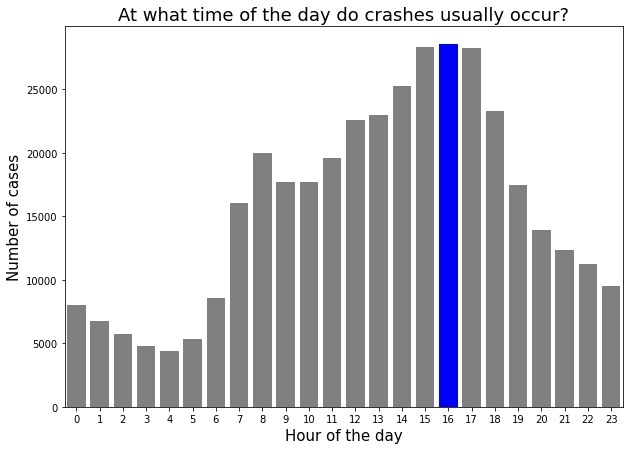

In [209]:
plt.figure(figsize=(10, 7))
bar = sns.countplot(x='CRASH_HOUR', color="gray", data=df1)

plt.xlabel("Hour of the day", size=15)
plt.ylabel("Number of cases", size=15)
plt.title("At what time of the day do crashes usually occur?", size=18)
patch_h = []    
for patch in bar.patches:
    reading = patch.get_height()
    patch_h.append(reading)
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)   
# np.argmax return the index of largest value of the list

bar.patches[idx_tallest].set_facecolor('blue'); 

#not surprising the the rush hours are the most prone to accidents, i.e. the hypothesis less traffic less accidents is getting some support here

In [67]:
conversion_dict =  {1: "Sunday", 2: "Monday", 3: "Tuesday", 4: "Wednesday", 5: "Thursday", 6: "Friday", 7: "Saturday"}
df1['CRASH_DAY'] = df1['CRASH_DAY_OF_WEEK'].replace(conversion_dict)

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381296 entries, 0 to 381295
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                381296 non-null  object        
 1   RD_NO                          377647 non-null  object        
 2   CRASH_DATE                     381296 non-null  datetime64[ns]
 3   POSTED_SPEED_LIMIT             381296 non-null  int64         
 4   TRAFFIC_CONTROL_DEVICE         381296 non-null  object        
 5   DEVICE_CONDITION               381296 non-null  object        
 6   WEATHER_CONDITION              381296 non-null  object        
 7   LIGHTING_CONDITION             381296 non-null  object        
 8   FIRST_CRASH_TYPE               381296 non-null  object        
 9   TRAFFICWAY_TYPE                381296 non-null  object        
 10  ALIGNMENT                      381296 non-null  object        
 11  

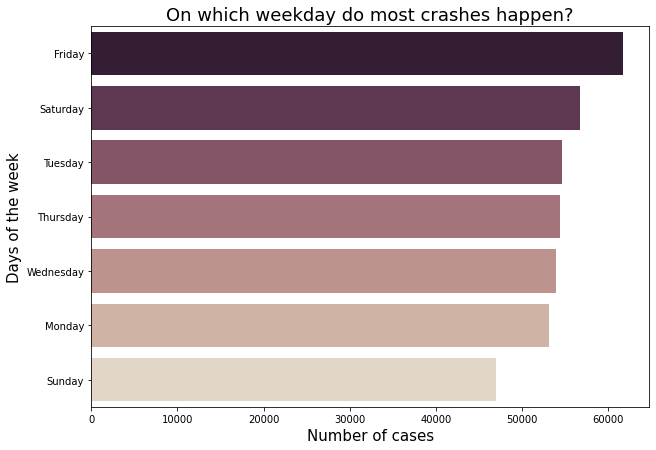

In [69]:
plt.figure(figsize=(10, 7))
sns.countplot(y='CRASH_DAY', palette="ch:.25_r", data=df1, order = df1['CRASH_DAY'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Days of the week", size=15)
plt.title("On which weekday do most crashes happen?", size=18);
#slightly more on Friday and least of all on Sunday - i.e. less traffic less crashing

Mapping the fatal crashes

In [72]:
m = folium.Map([41.8781, -87.6298], zoom_start=11)
m

In [73]:
df1['LATITUDE'].apply (pd.to_numeric, errors='coerce')

0         41.919664
1         41.773456
2         41.802119
3               NaN
4         41.741804
            ...    
381291    41.877790
381292    41.800697
381293    41.924709
381294    41.802871
381295    41.953010
Name: LATITUDE, Length: 381296, dtype: float64

In [74]:
df1['LATITUDE'].dropna(inplace=True)

In [75]:
df1['LONGITUDE'].apply (pd.to_numeric, errors='coerce')

0        -87.773288
1        -87.585022
2        -87.622115
3               NaN
4        -87.740954
            ...    
381291   -87.636488
381292   -87.706358
381293   -87.717371
381294   -87.684416
381295   -87.787707
Name: LONGITUDE, Length: 381296, dtype: float64

In [76]:
df1['LONGITUDE'].dropna(inplace=True)

In [77]:
df1.reset_index(drop=True, inplace=True)

In [78]:
df1.info

<bound method DataFrame.info of                                           CRASH_RECORD_ID     RD_NO  \
0       4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...  JC343143   
1       ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...  JD292400   
2       f8960f698e870ebdc60b521b2a141a5395556bc3704191...  JD293602   
3       8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...  JD290451   
4       00e47f189660cd8ba1e85fc63061bf1d8465184393f134...  JC194776   
...                                                   ...       ...   
381291  f37d01cdad7c3e9fe01562aa11857405cc2ea38738d8b6...  JE116847   
381292  f1dba052d8fc8c80d3d693296ff8e0d7cc71d5929677b0...  JE118336   
381293  f2962f241a302417913e1b7465e8ae37e6f3161adaa0cf...  JE118196   
381294  f361f7362d783dc327e5e6b7d2d9bc4bd942284391ad36...  JE118233   
381295  f51408f91e4d33372bf353d02203a96a039448b4d75375...  JE118305   

                CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0      2019-07-10 17:56:00                

In [79]:
#testing for missing values
df1['LONGITUDE'].isna().sum()

2262

In [80]:
df1['LATITUDE'].isna().sum()

2262

In [81]:
#dropping the missing data
df1.dropna(subset=['LATITUDE','LONGITUDE'], inplace =True)

In [82]:
df1['LONGITUDE'].isna().sum()

0

In [91]:
df1.dropna(subset=['LATITUDE','LONGITUDE', 'INJURIES_FATAL'], inplace =True)

In [101]:
df1['LONGITUDE'].isna().sum()

0

In [93]:
df1['INJURIES_FATAL'].isna().sum()

0

In [98]:
df1['INJURIES_FATAL'].sum()

439.0

In [105]:
#picking a new df2 with only fatal crashes
df2 = df1[['INJURIES_FATAL','LATITUDE','LONGITUDE']]

In [106]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378204 entries, 0 to 381295
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   INJURIES_FATAL  378204 non-null  float64
 1   LATITUDE        378204 non-null  float64
 2   LONGITUDE       378204 non-null  float64
dtypes: float64(3)
memory usage: 11.5 MB


In [112]:
df2.head()

,INJURIES_FATAL,LATITUDE,LONGITUDE
286,1.0,41.737903,-87.642336
633,1.0,41.885242,-87.719702
1302,1.0,41.990581,-87.694474
1844,1.0,41.784386,-87.740066
3205,1.0,41.744152,-87.585945


In [113]:
df2.reset_index(drop=True, inplace=True)

In [108]:
df2= df2[df2['INJURIES_FATAL'] != 0]

In [180]:
df2

,INJURIES_FATAL,LATITUDE,LONGITUDE
0,1.0,41.737903,-87.642336
1,1.0,41.885242,-87.719702
2,1.0,41.990581,-87.694474
3,1.0,41.784386,-87.740066
4,1.0,41.744152,-87.585945
...,...,...,...
401,1.0,41.764008,-87.722499
402,1.0,41.758728,-87.741536
403,1.0,41.734449,-87.643426
404,1.0,41.888533,-87.725735


In [183]:
m = folium.Map([41.8781, -87.6298], zoom_start=11)

In [184]:
for index, row in df2.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']],
                        radius=2,
                        #popup=row['name'],
                        #fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [185]:
#mapping the fatal crashes
m

In [186]:
m2 = folium.Map([41.8781, -87.6298], zoom_start=11)

In [194]:
# converting the values into a heatmap
crashloc = df2[['LATITUDE','LONGITUDE']]

# plot heatmap
m2.add_child(plugins.HeatMap(crashloc, radius=15))
m2
#more crashes in downtown area and slightly more in the south side

In [196]:
df2

,INJURIES_FATAL,LATITUDE,LONGITUDE
0,1.0,41.737903,-87.642336
1,1.0,41.885242,-87.719702
2,1.0,41.990581,-87.694474
3,1.0,41.784386,-87.740066
4,1.0,41.744152,-87.585945
...,...,...,...
401,1.0,41.764008,-87.722499
402,1.0,41.758728,-87.741536
403,1.0,41.734449,-87.643426
404,1.0,41.888533,-87.725735


In [215]:
#splitting the dataframe into 2 based on the injuries type by merging together fata and incapacitating injuries
df1auch = df1[(df1['INJURIES_INCAPACITATING'] + df1['INJURIES_FATAL']) > 0]


In [216]:
df1auch


,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,YEAR,MONTH,CRASH_DAY
86,1d6129948f25958aaa828c48f46ede1d07d9a14a29431f...,JC448649,2019-09-25 23:10:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,23,4,9,41.892782,-87.615890,POINT (-87.615889927957 41.892781623007),2019,9,Wednesday
88,1ec7df5197ad2c75687061922a58daaedf81612ff92be2...,JB451305,2018-09-26 08:27:00,0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,8,4,9,41.844276,-87.714722,POINT (-87.714722500033 41.844276406013),2018,9,Wednesday
216,0aa80cb8770255d8759483818bf6140b9d2a595ec2e915...,JE115529,2021-01-17 14:13:00,30,NO CONTROLS,UNKNOWN,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,14,1,1,41.757510,-87.626503,POINT (-87.626502764468 41.757510319211),2021,1,Sunday
224,6a753aacc3c712fae192f3a1ab2e326dfbe9201ea37cfa...,JB427549,2018-09-01 19:00:00,15,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,PEDESTRIAN,PARKING LOT,...,0.0,19,7,9,41.950677,-87.643785,POINT (-87.64378474303 41.950676838996),2018,9,Saturday
237,16cf042b20d4c66e4c81082a3638c09b761b99a70ad038...,JE152723,2021-02-26 08:58:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,...,0.0,8,6,2,41.751194,-87.605367,POINT (-87.60536732633 41.751194338222),2021,2,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380865,ffc006011de84ae6a24166dce2a88b825ee8dbade53125...,JB311360,2018-06-17 22:20:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,22,1,6,41.945285,-87.800265,POINT (-87.800265046735 41.945285379827),2018,6,Sunday
380973,ffd2b728d2b2ad589bd579ba7a87db904ddf8c5e85dacd...,JC433957,2019-09-15 04:20:00,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,0.0,4,1,9,41.885382,-87.657595,POINT (-87.657595099966 41.885381651502),2019,9,Sunday
381077,ffe24f13864b13ca12712c1b035b2bdc53f032b64b773e...,JA528518,2017-11-28 15:35:00,0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,OTHER,...,0.0,15,3,11,41.949082,-87.751964,POINT (-87.75196391799 41.949081718053),2017,11,Tuesday
381187,fff716e5199327e26978cb93fb165d141c84439d0513a2...,JD119575,2020-01-17 16:10:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,REAR END,NOT DIVIDED,...,0.0,16,6,1,41.997178,-87.748380,POINT (-87.748379748961 41.997178170351),2020,1,Friday


In [222]:
df1ok = df1[(df1['INJURIES_INCAPACITATING'] + df1['INJURIES_FATAL']) == 0]

In [220]:
df1auch.reset_index(drop=True, inplace=True)

In [221]:
df1auch


,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,YEAR,MONTH,CRASH_DAY
0,1d6129948f25958aaa828c48f46ede1d07d9a14a29431f...,JC448649,2019-09-25 23:10:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,23,4,9,41.892782,-87.615890,POINT (-87.615889927957 41.892781623007),2019,9,Wednesday
1,1ec7df5197ad2c75687061922a58daaedf81612ff92be2...,JB451305,2018-09-26 08:27:00,0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,8,4,9,41.844276,-87.714722,POINT (-87.714722500033 41.844276406013),2018,9,Wednesday
2,0aa80cb8770255d8759483818bf6140b9d2a595ec2e915...,JE115529,2021-01-17 14:13:00,30,NO CONTROLS,UNKNOWN,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,14,1,1,41.757510,-87.626503,POINT (-87.626502764468 41.757510319211),2021,1,Sunday
3,6a753aacc3c712fae192f3a1ab2e326dfbe9201ea37cfa...,JB427549,2018-09-01 19:00:00,15,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,PEDESTRIAN,PARKING LOT,...,0.0,19,7,9,41.950677,-87.643785,POINT (-87.64378474303 41.950676838996),2018,9,Saturday
4,16cf042b20d4c66e4c81082a3638c09b761b99a70ad038...,JE152723,2021-02-26 08:58:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,...,0.0,8,6,2,41.751194,-87.605367,POINT (-87.60536732633 41.751194338222),2021,2,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7294,ffc006011de84ae6a24166dce2a88b825ee8dbade53125...,JB311360,2018-06-17 22:20:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,22,1,6,41.945285,-87.800265,POINT (-87.800265046735 41.945285379827),2018,6,Sunday
7295,ffd2b728d2b2ad589bd579ba7a87db904ddf8c5e85dacd...,JC433957,2019-09-15 04:20:00,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,0.0,4,1,9,41.885382,-87.657595,POINT (-87.657595099966 41.885381651502),2019,9,Sunday
7296,ffe24f13864b13ca12712c1b035b2bdc53f032b64b773e...,JA528518,2017-11-28 15:35:00,0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,OTHER,...,0.0,15,3,11,41.949082,-87.751964,POINT (-87.75196391799 41.949081718053),2017,11,Tuesday
7297,fff716e5199327e26978cb93fb165d141c84439d0513a2...,JD119575,2020-01-17 16:10:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,REAR END,NOT DIVIDED,...,0.0,16,6,1,41.997178,-87.748380,POINT (-87.748379748961 41.997178170351),2020,1,Friday


In [223]:
df1ok

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,YEAR,MONTH,CRASH_DAY
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,2019-07-10 17:56:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),2019,7,Wednesday
1,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,2020-07-10 10:25:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,...,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008),2020,7,Friday
2,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,2020-07-11 01:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011),2020,7,Saturday
4,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,JC194776,2019-03-21 22:50:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,...,0.0,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989),2019,3,Thursday
5,0126747fc9ffc0edc9a38abb83d80034f897db0f739eef...,JB200478,2018-03-26 14:23:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,14,2,3,41.953647,-87.732082,POINT (-87.732081736006 41.953646899951),2018,3,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381291,f37d01cdad7c3e9fe01562aa11857405cc2ea38738d8b6...,JE116847,2021-01-19 07:30:00,15,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,FIXED OBJECT,PARKING LOT,...,0.0,7,3,1,41.877790,-87.636488,POINT (-87.636487589354 41.877790161619),2021,1,Tuesday
381292,f1dba052d8fc8c80d3d693296ff8e0d7cc71d5929677b0...,JE118336,2021-01-20 17:50:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,17,4,1,41.800697,-87.706358,POINT (-87.706357916164 41.800697419369),2021,1,Wednesday
381293,f2962f241a302417913e1b7465e8ae37e6f3161adaa0cf...,JE118196,2021-01-20 16:15:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,16,4,1,41.924709,-87.717371,POINT (-87.717371333013 41.924708659649),2021,1,Wednesday
381294,f361f7362d783dc327e5e6b7d2d9bc4bd942284391ad36...,JE118233,2021-01-20 15:20:00,30,STOP SIGN/FLASHER,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,15,4,1,41.802871,-87.684416,POINT (-87.684416341899 41.802870816721),2021,1,Wednesday


In [224]:
df1ok.reset_index(drop=True, inplace=True)

In [225]:
df1ok

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,YEAR,MONTH,CRASH_DAY
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,2019-07-10 17:56:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993),2019,7,Wednesday
1,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,2020-07-10 10:25:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,...,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008),2020,7,Friday
2,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,2020-07-11 01:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011),2020,7,Saturday
3,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,JC194776,2019-03-21 22:50:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,...,0.0,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989),2019,3,Thursday
4,0126747fc9ffc0edc9a38abb83d80034f897db0f739eef...,JB200478,2018-03-26 14:23:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,14,2,3,41.953647,-87.732082,POINT (-87.732081736006 41.953646899951),2018,3,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370900,f37d01cdad7c3e9fe01562aa11857405cc2ea38738d8b6...,JE116847,2021-01-19 07:30:00,15,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,FIXED OBJECT,PARKING LOT,...,0.0,7,3,1,41.877790,-87.636488,POINT (-87.636487589354 41.877790161619),2021,1,Tuesday
370901,f1dba052d8fc8c80d3d693296ff8e0d7cc71d5929677b0...,JE118336,2021-01-20 17:50:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,17,4,1,41.800697,-87.706358,POINT (-87.706357916164 41.800697419369),2021,1,Wednesday
370902,f2962f241a302417913e1b7465e8ae37e6f3161adaa0cf...,JE118196,2021-01-20 16:15:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,16,4,1,41.924709,-87.717371,POINT (-87.717371333013 41.924708659649),2021,1,Wednesday
370903,f361f7362d783dc327e5e6b7d2d9bc4bd942284391ad36...,JE118233,2021-01-20 15:20:00,30,STOP SIGN/FLASHER,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,15,4,1,41.802871,-87.684416,POINT (-87.684416341899 41.802870816721),2021,1,Wednesday


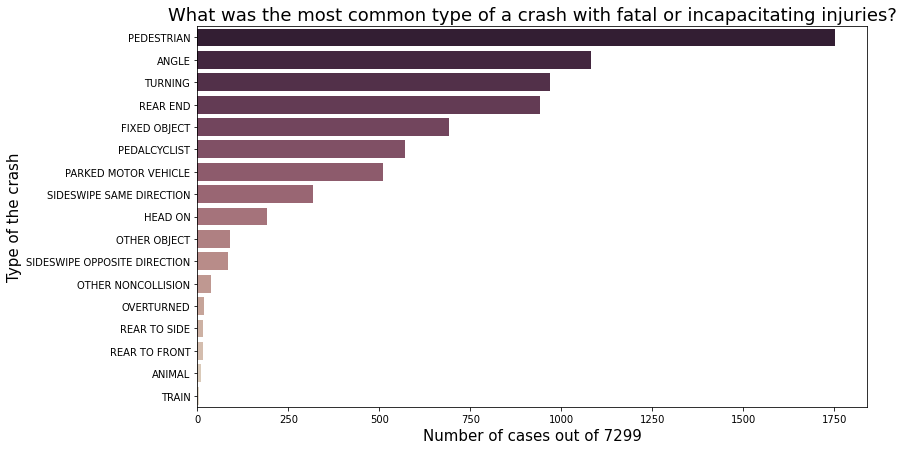

In [228]:
plt.figure(figsize=(12, 7))
sns.countplot(y='FIRST_CRASH_TYPE', palette="ch:.25_r", data=df1auch, order = df1auch['FIRST_CRASH_TYPE'].value_counts().index)
plt.xlabel(f"Number of cases out of {len(df1auch)}", size=15)
plt.ylabel("Type of the crash", size=15)
plt.title("What was the most common type of a crash with fatal or incapacitating injuries?", size=18);
#the most common crush with fatalities or incapacitating injuries occurs to the pedestrians - almost twice as common as the runner ups angle, turning and rear end


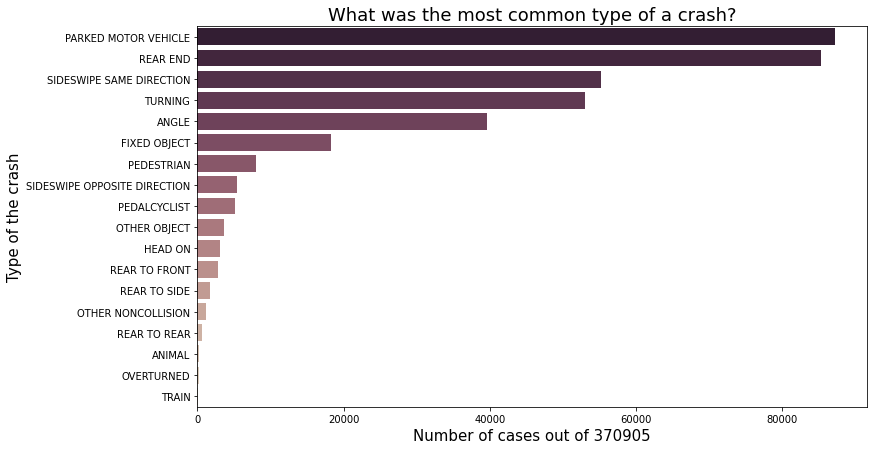

In [227]:
plt.figure(figsize=(12, 7))
sns.countplot(y='FIRST_CRASH_TYPE', palette="ch:.25_r", data=df1ok, order = df1ok['FIRST_CRASH_TYPE'].value_counts().index)
plt.xlabel(f"Number of cases out of {len(df1ok)}", size=15)
plt.ylabel("Type of the crash", size=15)
plt.title("What was the most common type of a crash without injuries?", size=18);
#the two most common are crashes into parked motor vehicle and rear end - as in the total dataset

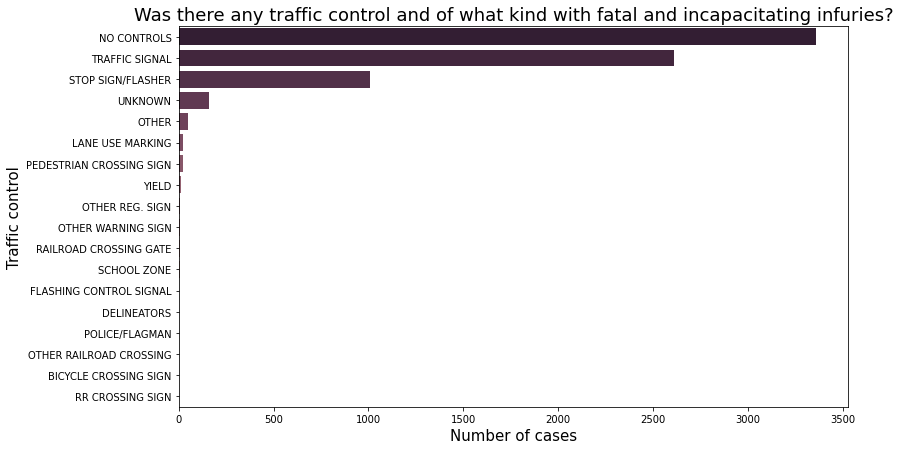

In [231]:
plt.figure(figsize=(12, 7))
sns.countplot(y='TRAFFIC_CONTROL_DEVICE', palette="ch:.25_r", data=df1auch, order = df1auch['TRAFFIC_CONTROL_DEVICE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Traffic control", size=15)
plt.title("Was there any traffic control and of what kind with fatal and incapacitating infuries?", size=18);
#mostly no control or traffic signal

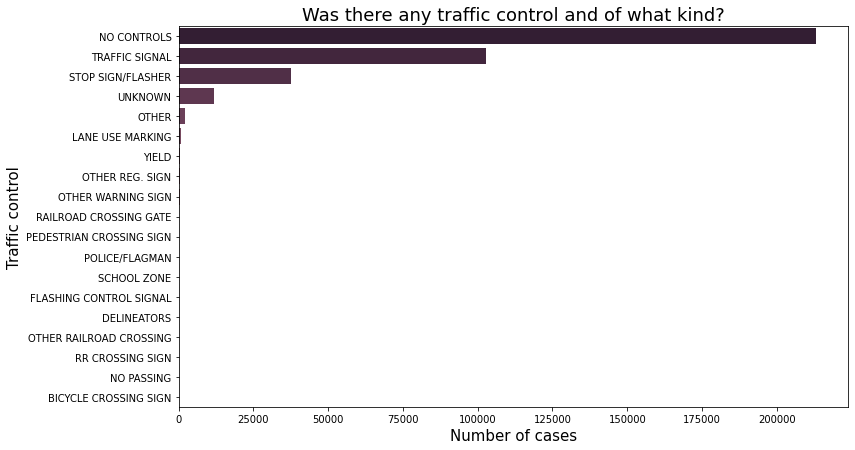

In [232]:
plt.figure(figsize=(12, 7))
sns.countplot(y='TRAFFIC_CONTROL_DEVICE', palette="ch:.25_r", data=df1ok, order = df1ok['TRAFFIC_CONTROL_DEVICE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Traffic control", size=15)
plt.title("Was there any traffic control and of what kind?", size=18);
#mostly no control but less proportionally cases with signals

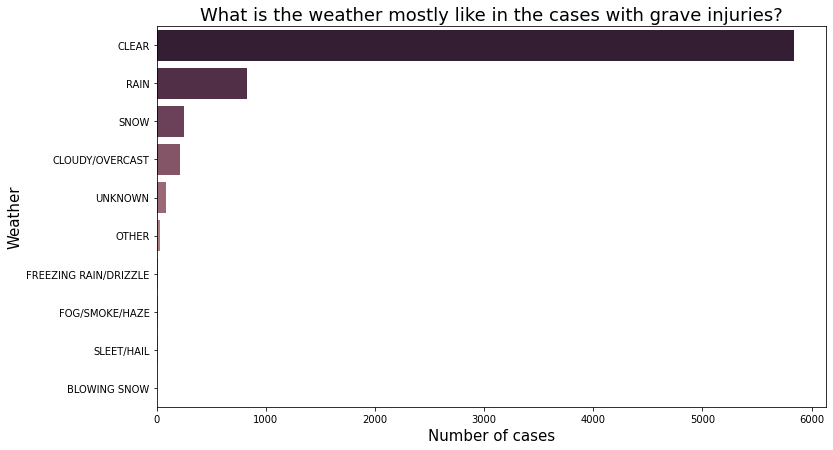

In [233]:
plt.figure(figsize=(12, 7))
sns.countplot(y='WEATHER_CONDITION', palette="ch:.25_r", data=df1auch, order = df1auch['WEATHER_CONDITION'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Weather", size=15)
plt.title("What is the weather mostly like in the cases with grave injuries?", size=18);
#mostly clear weather

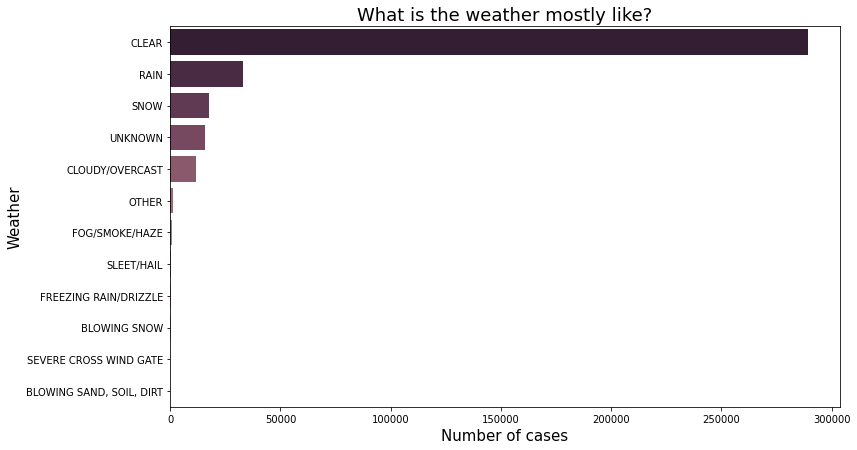

In [234]:
plt.figure(figsize=(12, 7))
sns.countplot(y='WEATHER_CONDITION', palette="ch:.25_r", data=df1ok, order = df1ok['WEATHER_CONDITION'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Weather", size=15)
plt.title("What is the weather mostly like?", size=18);
#mostly clear weather

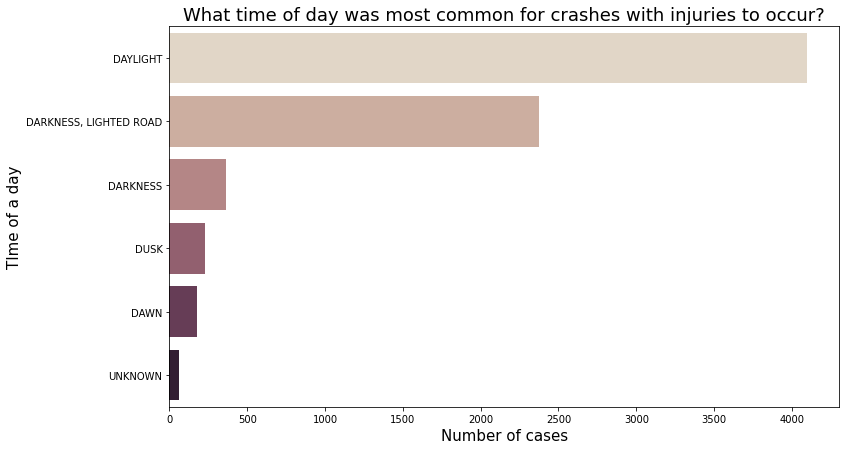

In [236]:
plt.figure(figsize=(12, 7))
sns.countplot(y='LIGHTING_CONDITION', palette="ch:.25", data=df1auch, order = df1auch['LIGHTING_CONDITION'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("TIme of a day", size=15)
plt.title("What time of day was most common for crashes with injuries to occur?", size=18);
#mostly happening in a broad daylight with darkness on a lit road coming second

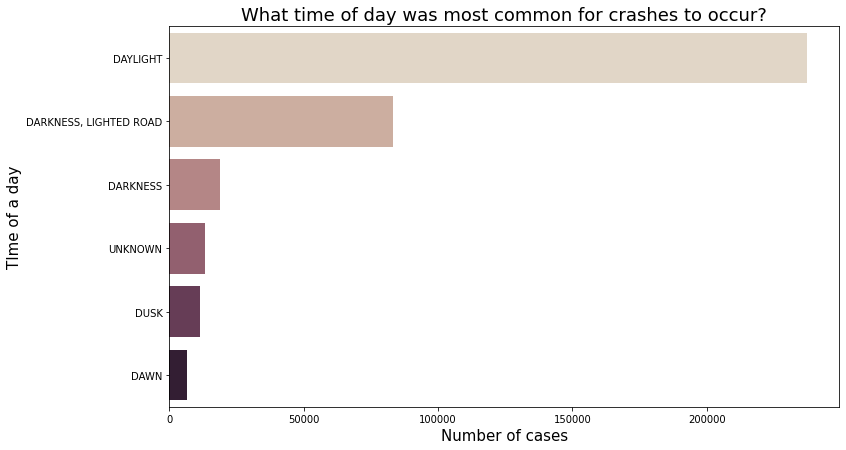

In [238]:
plt.figure(figsize=(12, 7))
sns.countplot(y='LIGHTING_CONDITION', palette="ch:.25", data=df1ok, order = df1ok['LIGHTING_CONDITION'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("TIme of a day", size=15)
plt.title("What time of day was most common for crashes to occur?", size=18);
#mostly happening in a broad daylight and proportionally less in darkness with a lit road than with injuries

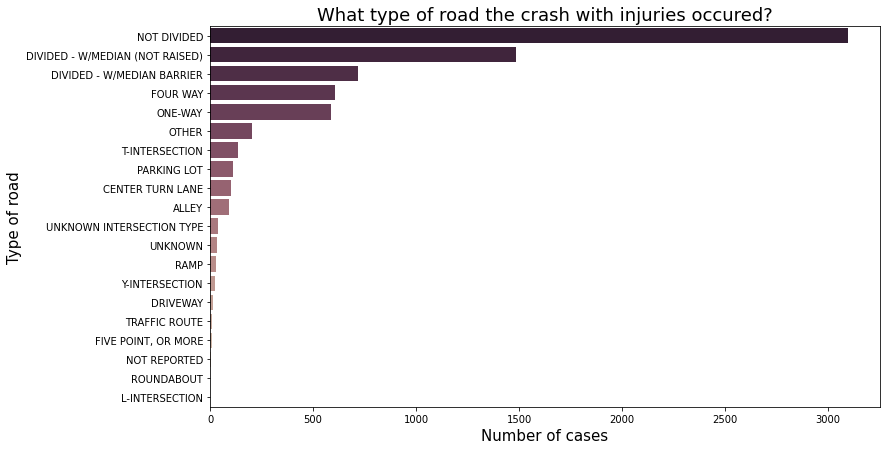

In [284]:
plt.figure(figsize=(12, 7))
sns.countplot(y='TRAFFICWAY_TYPE', palette="ch:.25_r", data=df1auch, order = df1auch['TRAFFICWAY_TYPE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Type of road", size=15)
plt.title("What type of road the crash with injuries occured?", size=18);
#mostly not divided - i.e. not impeding the maneuvre - sililar to the whole dataset

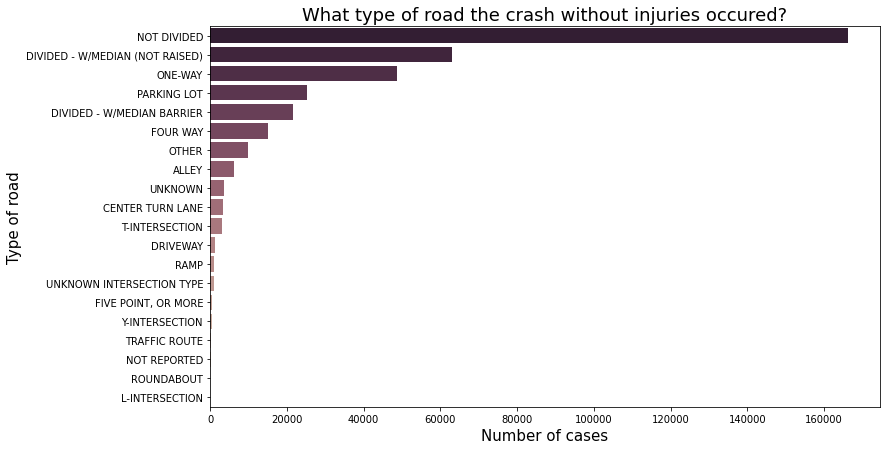

In [252]:
plt.figure(figsize=(12, 7))
sns.countplot(y='TRAFFICWAY_TYPE', palette="ch:.25_r", data=df1ok, order = df1ok['TRAFFICWAY_TYPE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Type of road", size=15)
plt.title("What type of road the crash without injuries occured?", size=18);
#mostly not divided - i.e. not impeding the maneuvre

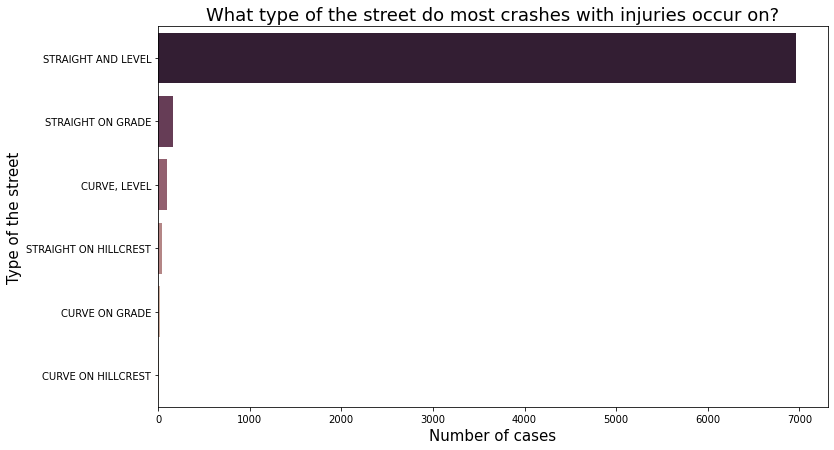

In [254]:
plt.figure(figsize=(12, 7))
sns.countplot(y='ALIGNMENT', palette="ch:.25_r", data=df1auch, order = df1auch['ALIGNMENT'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Type of the street", size=15)
plt.title("What type of the street do most crashes with injuries occur on?", size=18);
#mostly straight and level streets, i.e. Chicago is flat

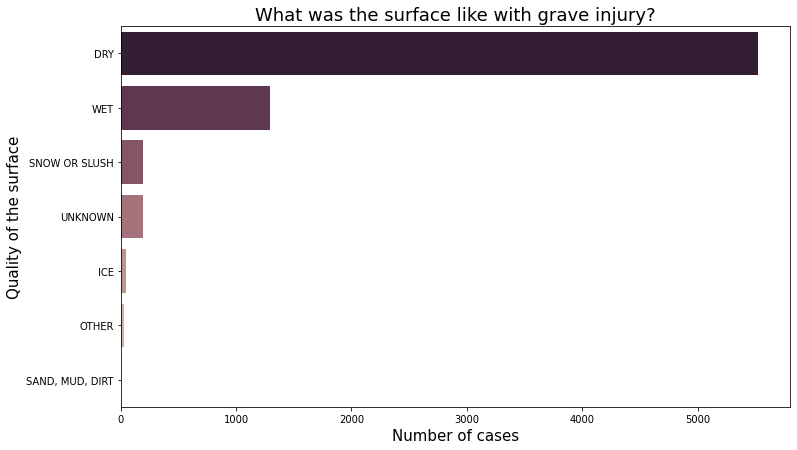

In [255]:
plt.figure(figsize=(12, 7))
sns.countplot(y='ROADWAY_SURFACE_COND', palette="ch:.25_r", data=df1auch, order = df1auch['ROADWAY_SURFACE_COND'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Quality of the surface", size=15)
plt.title("What was the surface like with grave injury?", size=18);
#mostly dry surface

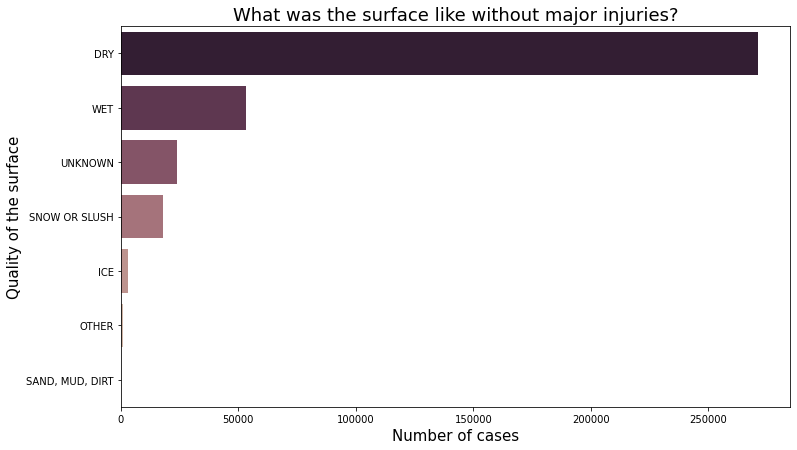

In [256]:
plt.figure(figsize=(12, 7))
sns.countplot(y='ROADWAY_SURFACE_COND', palette="ch:.25_r", data=df1ok, order = df1ok['ROADWAY_SURFACE_COND'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Quality of the surface", size=15)
plt.title("What was the surface like without major injuries?", size=18);
#mostly dry surface

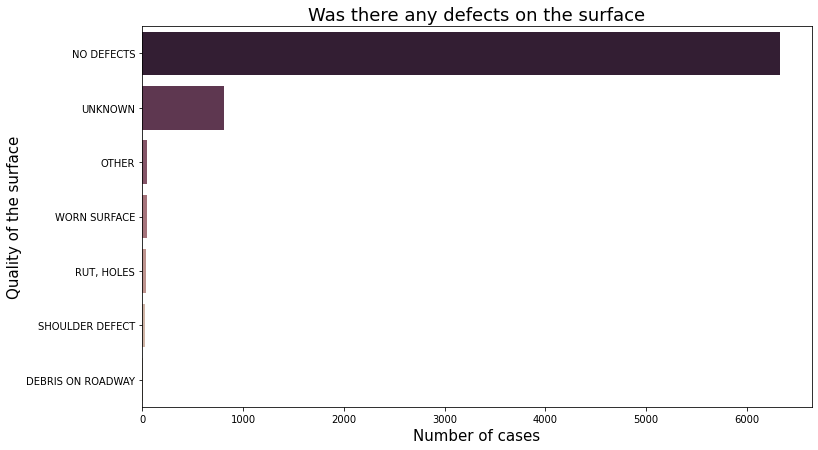

In [244]:
plt.figure(figsize=(12, 7))
sns.countplot(y='ROAD_DEFECT', palette="ch:.25_r", data=df1auch, order = df1auch['ROAD_DEFECT'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Quality of the surface", size=15)
plt.title("Was there any defects on the surface when injuries occur?", size=18);
#mostly no defects - same

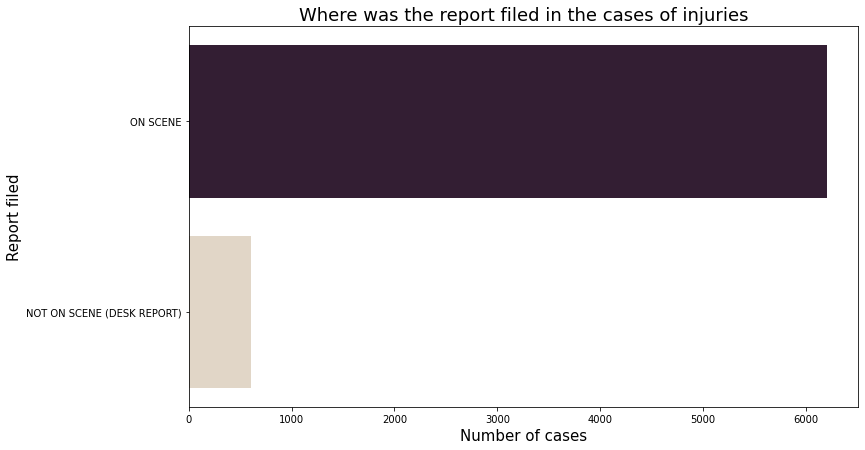

In [257]:
plt.figure(figsize=(12, 7))
sns.countplot(y='REPORT_TYPE', palette="ch:.25_r", data=df1auch, order = df1auch['REPORT_TYPE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Report filed", size=15)
plt.title("Where was the report filed in the cases of injuries", size=18);
#on the scene in the cases with injuries!

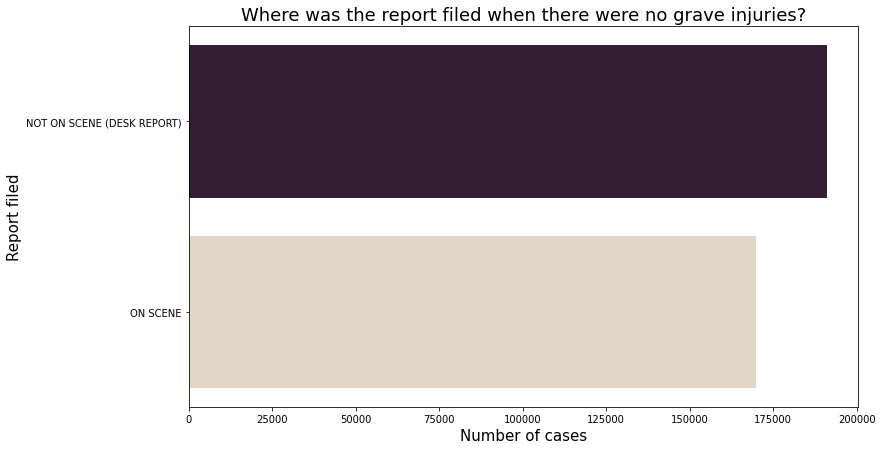

In [259]:
plt.figure(figsize=(12, 7))
sns.countplot(y='REPORT_TYPE', palette="ch:.25_r", data=df1ok, order = df1ok['REPORT_TYPE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Report filed", size=15)
plt.title("Where was the report filed when there were no grave injuries?", size=18);
#how come it's almost 50/50 split?

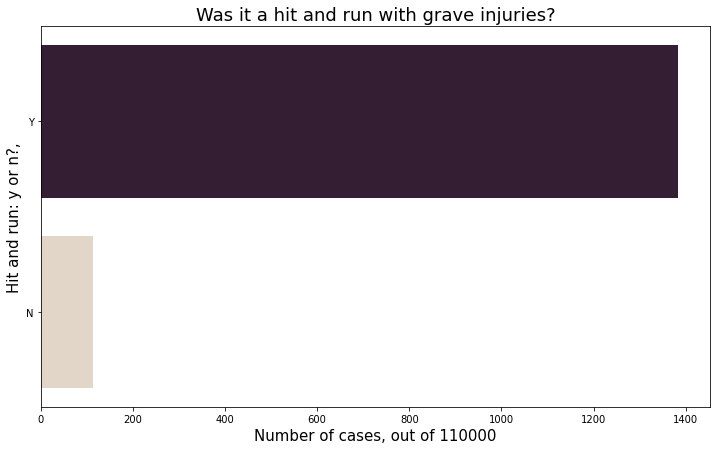

In [260]:
plt.figure(figsize=(12, 7))
sns.countplot(y='HIT_AND_RUN_I', palette="ch:.25_r", data=df1auch, order = df1auch['HIT_AND_RUN_I'].value_counts().index)
plt.xlabel("Number of cases, out of 110000", size=15)
plt.ylabel("Hit and run: y or n?,", size=15)
plt.title("Was it a hit and run with grave injuries?", size=18);
#vast majority of the cases

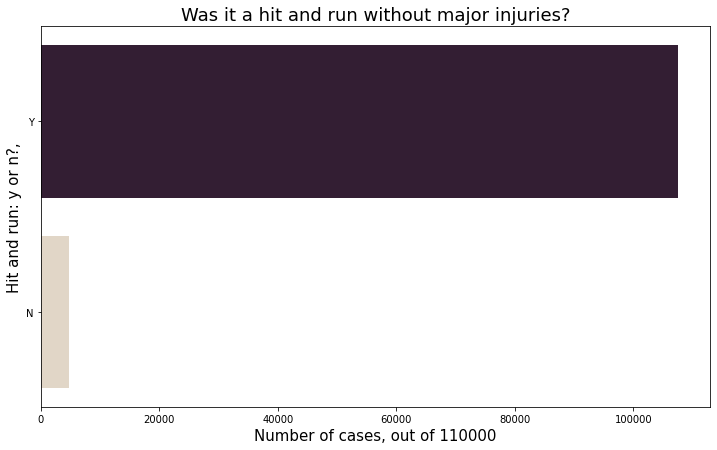

In [261]:
plt.figure(figsize=(12, 7))
sns.countplot(y='HIT_AND_RUN_I', palette="ch:.25_r", data=df1ok, order = df1ok['HIT_AND_RUN_I'].value_counts().index)
plt.xlabel("Number of cases, out of 110000", size=15)
plt.ylabel("Hit and run: y or n?,", size=15)
plt.title("Was it a hit and run without major injuries?", size=18);
#vast majority of the cases

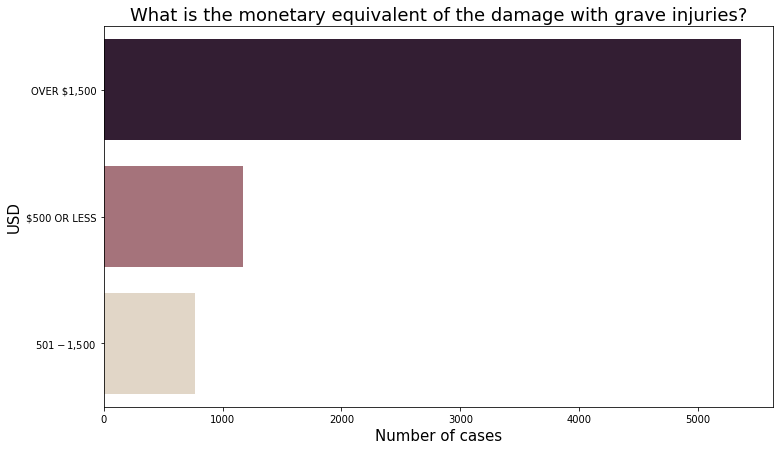

In [262]:
plt.figure(figsize=(12, 7))
sns.countplot(y='DAMAGE', palette="ch:.25_r", data=df1auch, order = df1auch['DAMAGE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("USD", size=15)
plt.title("What is the monetary equivalent of the damage with grave injuries?", size=18);
#mostly the over 1500

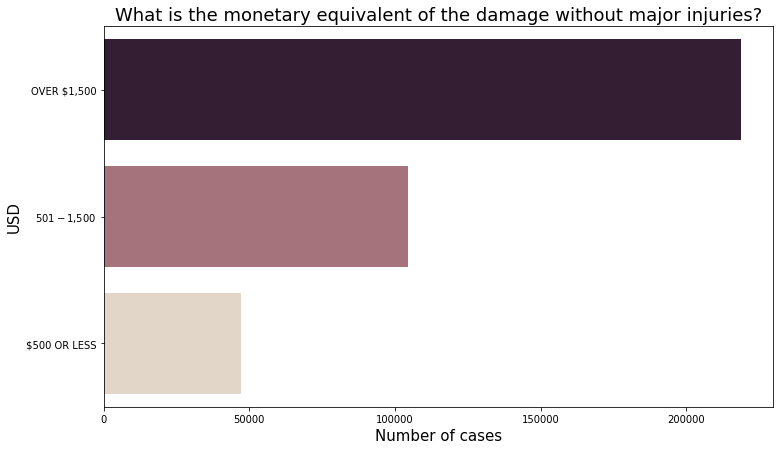

In [263]:
plt.figure(figsize=(12, 7))
sns.countplot(y='DAMAGE', palette="ch:.25_r", data=df1ok, order = df1ok['DAMAGE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("USD", size=15)
plt.title("What is the monetary equivalent of the damage without major injuries?", size=18);


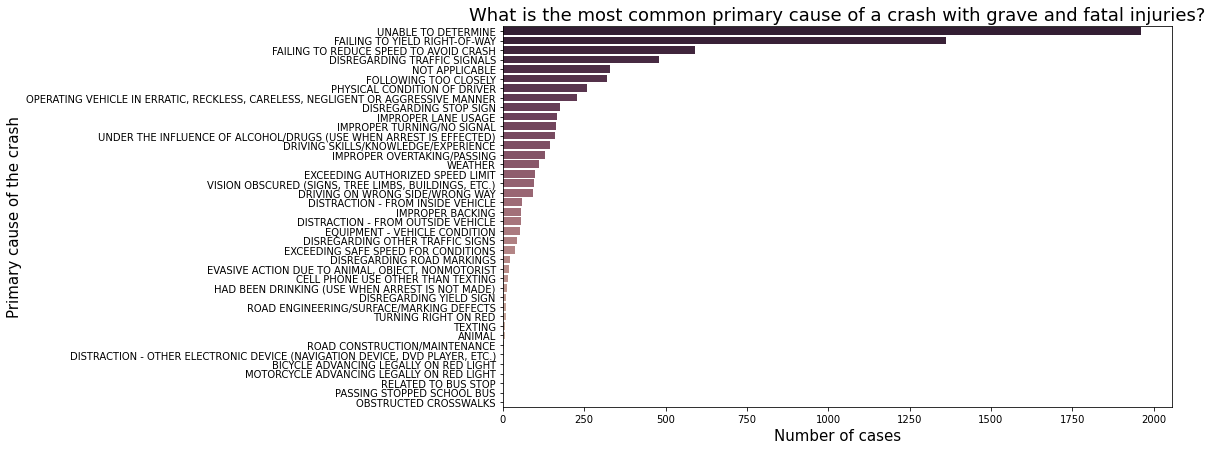

In [265]:
plt.figure(figsize=(12, 7))
sns.countplot(y='PRIM_CONTRIBUTORY_CAUSE', palette="ch:.25_r", data=df1auch, order = df1auch['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Primary cause of the crash", size=15)
plt.title("What is the most common primary cause of a crash with grave and fatal injuries?", size=18);
#after not able to determine, the failing to yield right of way and failing to reduce the speed as well as disregarding the signals


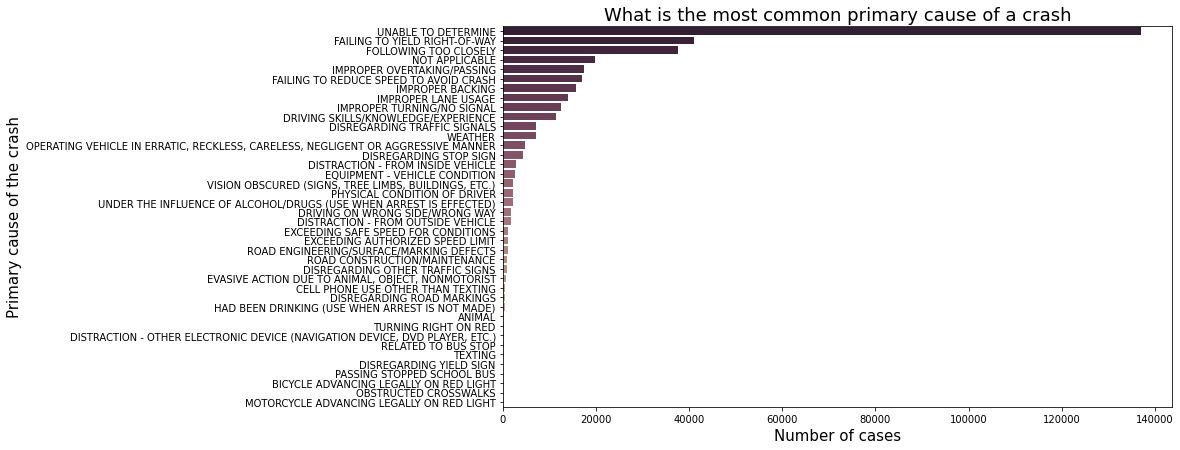

In [266]:
plt.figure(figsize=(12, 7))
sns.countplot(y='PRIM_CONTRIBUTORY_CAUSE', palette="ch:.25_r", data=df1ok, order = df1ok['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Primary cause of the crash", size=15)
plt.title("What is the most common primary cause of a crash with no serious injuries?", size=18);
#after not able to determine, the failing to yield right of way and following too closely are the top causes


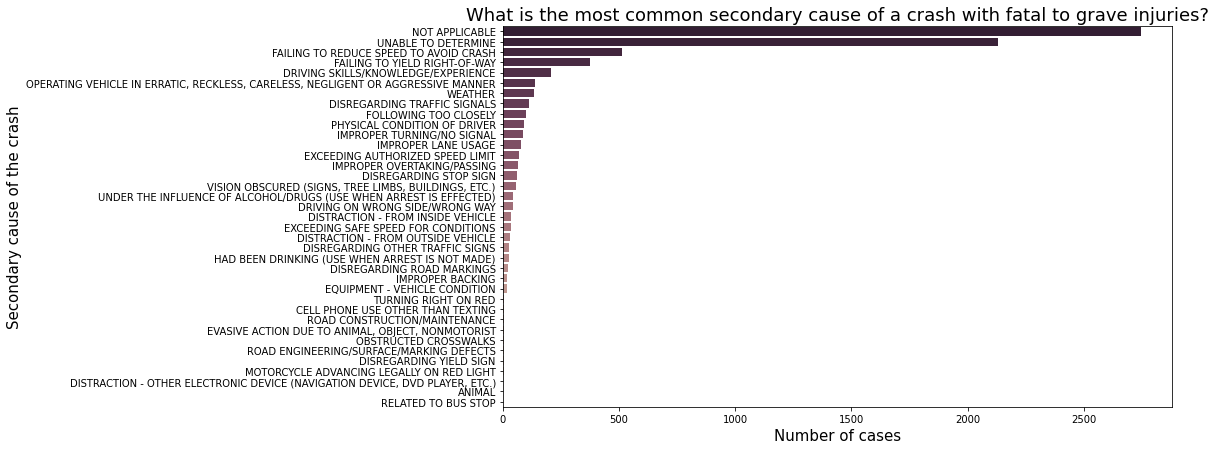

In [274]:
plt.figure(figsize=(12, 7))
sns.countplot(y='SEC_CONTRIBUTORY_CAUSE', palette="ch:.25_r", data=df1auch, order = df1auch['SEC_CONTRIBUTORY_CAUSE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Secondary cause of the crash", size=15)
plt.title("What is the most common secondary cause of a crash with fatal to grave injuries?", size=18);
#after not able to determine and n/a, the failing to reduce speed followed by failing to yield right of way 


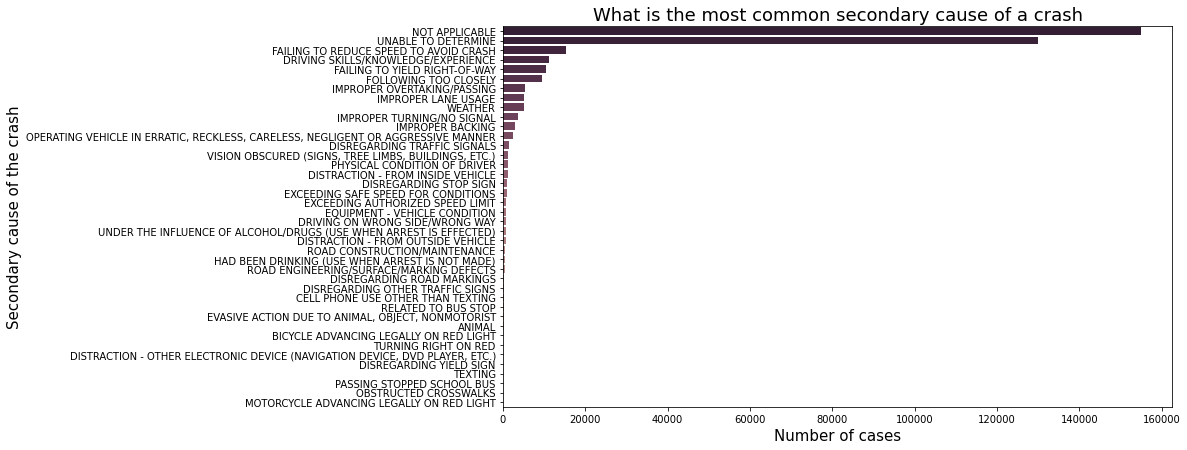

In [275]:
plt.figure(figsize=(12, 7))
sns.countplot(y='SEC_CONTRIBUTORY_CAUSE', palette="ch:.25_r", data=df1ok, order = df1ok['SEC_CONTRIBUTORY_CAUSE'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Secondary cause of the crash", size=15)
plt.title("What is the most common secondary cause of a crash", size=18);
#after not able to determine and n/a, the failing to yield right of way and following too closely are preceded by failing to reduce speed and the lack of experience as the top causes


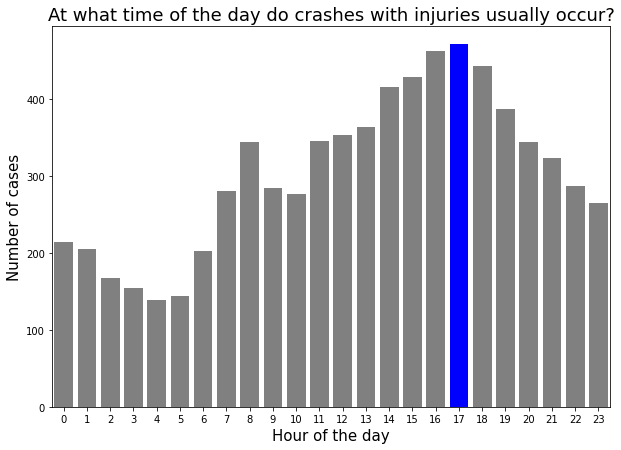

In [276]:
plt.figure(figsize=(10, 7))
bar = sns.countplot(x='CRASH_HOUR', color="gray", data=df1auch)

plt.xlabel("Hour of the day", size=15)
plt.ylabel("Number of cases", size=15)
plt.title("At what time of the day do crashes with injuries usually occur?", size=18)
patch_h = []    
for patch in bar.patches:
    reading = patch.get_height()
    patch_h.append(reading)
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)   
# np.argmax return the index of largest value of the list

bar.patches[idx_tallest].set_facecolor('blue'); 

#not surprising the the rush hours are the most prone to accidents, i.e. the hypothesis less traffic less accidents is getting some support here, plus the shift towards 17 hrs

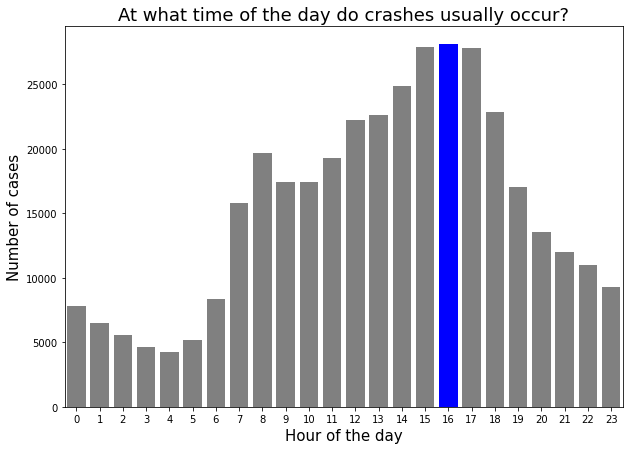

In [277]:
plt.figure(figsize=(10, 7))
bar = sns.countplot(x='CRASH_HOUR', color="gray", data=df1ok)

plt.xlabel("Hour of the day", size=15)
plt.ylabel("Number of cases", size=15)
plt.title("At what time of the day do crashes usually occur?", size=18)
patch_h = []    
for patch in bar.patches:
    reading = patch.get_height()
    patch_h.append(reading)
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)   
# np.argmax return the index of largest value of the list

bar.patches[idx_tallest].set_facecolor('blue'); 

#not surprising the the rush hours are the most prone to accidents, i.e. the hypothesis less traffic less accidents is getting some support here

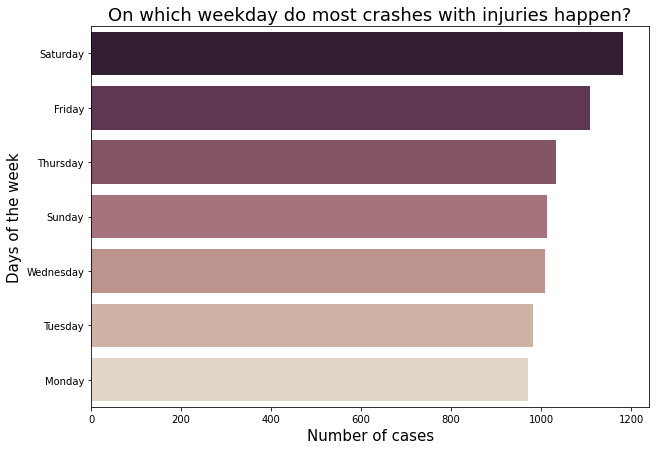

In [278]:
plt.figure(figsize=(10, 7))
sns.countplot(y='CRASH_DAY', palette="ch:.25_r", data=df1auch, order = df1auch['CRASH_DAY'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Days of the week", size=15)
plt.title("On which weekday do most crashes with injuries happen?", size=18);
#slightly more on Saturdays followed by Fridays and least of all on Mondays - i.e. less traffic less crashing

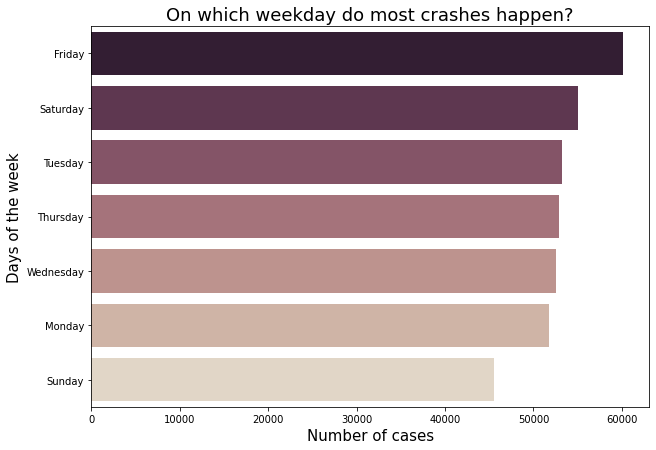

In [280]:
plt.figure(figsize=(10, 7))
sns.countplot(y='CRASH_DAY', palette="ch:.25_r", data=df1ok, order = df1ok['CRASH_DAY'].value_counts().index)
plt.xlabel("Number of cases", size=15)
plt.ylabel("Days of the week", size=15)
plt.title("On which weekday do most crashes happen?", size=18);
#slightly more on Fridays and least of all on Sundays - i.e. less traffic less crashing 